In [1]:
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
train = pd.read_csv('train.csv')
dd = pd.read_csv('data_dictionary.csv')
test = pd.read_csv('test.csv')

In [103]:
def transform(df):
    df = df.loc[~df.sii.isna()]
    seasons = [s for s in df.columns if 'Season' in s]
    for s in seasons:
        df['isSameSeason'+s] = (df['Basic_Demos-Enroll_Season'] == df[s]).astype(np.int8)
    
    df = df.loc[df['Physical-Weight'] > 0]
    df['BIA-BIA_Fat'] = df['BIA-BIA_Fat'].clip(0,100)

    df['activityScore'] = np.where(pd.isna(df['PAQ_A-PAQ_A_Total']) & ~pd.isna(df['PAQ_C-PAQ_C_Total']), df['PAQ_C-PAQ_C_Total'],  # If a is NaN and b is not NaN, use b
                np.where(~pd.isna(df['PAQ_A-PAQ_A_Total']) & pd.isna(df['PAQ_C-PAQ_C_Total']), df['PAQ_A-PAQ_A_Total'],  # If a is not NaN and b is NaN, use a
                np.where(df['Basic_Demos-Age'] > 13, df['PAQ_A-PAQ_A_Total'], df['PAQ_C-PAQ_C_Total']))) 
    df['activityScoreSeason'] = np.where(pd.isna(df['PAQ_A-Season']) & ~pd.isna(df['PAQ_C-Season']), df['PAQ_C-Season'],  # If a is NaN and b is not NaN, use b
                np.where(~pd.isna(df['PAQ_A-Season']) & pd.isna(df['PAQ_C-Season']), df['PAQ_A-Season'],  # If a is not NaN and b is NaN, use a
                np.where(df['Basic_Demos-Age'] > 13, df['PAQ_A-Season'], df['PAQ_C-Season']))) 
    df=df.drop('Physical-Waist_Circumference',axis=1)
    return df

noNaDa = train.loc[~train.sii.isna()]
noNaDa = transform(noNaDa)

In [108]:
noNaDa.loc[noNaDa['BIA-BIA_BMC']<00]#.max()

,id,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,Physical-Diastolic_BP,Physical-HeartRate,Physical-Systolic_BP,Fitness_Endurance-Season,Fitness_Endurance-Max_Stage,Fitness_Endurance-Time_Mins,Fitness_Endurance-Time_Sec,FGC-Season,FGC-FGC_CU,FGC-FGC_CU_Zone,FGC-FGC_GSND,FGC-FGC_GSND_Zone,FGC-FGC_GSD,FGC-FGC_GSD_Zone,FGC-FGC_PU,FGC-FGC_PU_Zone,FGC-FGC_SRL,FGC-FGC_SRL_Zone,FGC-FGC_SRR,FGC-FGC_SRR_Zone,FGC-FGC_TL,FGC-FGC_TL_Zone,BIA-Season,BIA-BIA_Activity_Level_num,BIA-BIA_BMC,BIA-BIA_BMI,BIA-BIA_BMR,BIA-BIA_DEE,BIA-BIA_ECW,BIA-BIA_FFM,BIA-BIA_FFMI,BIA-BIA_FMI,BIA-BIA_Fat,BIA-BIA_Frame_num,BIA-BIA_ICW,...,PAQ_A-Season,PAQ_A-PAQ_A_Total,PAQ_C-Season,PAQ_C-PAQ_C_Total,PCIAT-Season,PCIAT-PCIAT_01,PCIAT-PCIAT_02,PCIAT-PCIAT_03,PCIAT-PCIAT_04,PCIAT-PCIAT_05,PCIAT-PCIAT_06,PCIAT-PCIAT_07,PCIAT-PCIAT_08,PCIAT-PCIAT_09,PCIAT-PCIAT_10,PCIAT-PCIAT_11,PCIAT-PCIAT_12,PCIAT-PCIAT_13,PCIAT-PCIAT_14,PCIAT-PCIAT_15,PCIAT-PCIAT_16,PCIAT-PCIAT_17,PCIAT-PCIAT_18,PCIAT-PCIAT_19,PCIAT-PCIAT_20,PCIAT-PCIAT_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday,sii,isSameSeasonBasic_Demos-Enroll_Season,isSameSeasonCGAS-Season,isSameSeasonPhysical-Season,isSameSeasonFitness_Endurance-Season,isSameSeasonFGC-Season,isSameSeasonBIA-Season,isSameSeasonPAQ_A-Season,isSameSeasonPAQ_C-Season,isSameSeasonPCIAT-Season,isSameSeasonSDS-Season,isSameSeasonPreInt_EduHx-Season,activityScore,activityScoreSeason
55,0347462d,Winter,17,0,Spring,80.0,Spring,21.105405,74.0,164.4,68.0,83.0,120.0,NaN,NaN,NaN,NaN,Spring,27.0,1.0,30.4,1.0,28.1,1.0,10.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,Spring,4.0,-3.177770,21.1077,1767.38,3711.50,40.8109,130.5130,16.7568,4.350900,33.88750,3.0,54.7546,...,Spring,1.61,NaN,NaN,Spring,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,2.0,3.0,1.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,1.0,34.0,Spring,37.0,53.0,Winter,2.0,1.0,1,0,0,0,0,0,0,0,0,0,1,1.61,Spring
72,045a0a94,Summer,16,0,Fall,55.0,Fall,22.503088,69.0,152.4,66.0,110.0,116.0,NaN,NaN,NaN,NaN,Fall,10.0,0.0,25.8,1.0,28.5,1.0,8.0,0.0,0.0,0.0,0.0,0.0,13.0,1.0,Fall,3.0,-1.320460,22.5055,1742.01,2961.41,40.2764,127.8100,18.8742,3.631330,24.59020,2.0,55.4828,...,Fall,3.75,NaN,NaN,Fall,3.0,4.0,5.0,2.0,3.0,1.0,0.0,3.0,2.0,0.0,5.0,0.0,4.0,0.0,2.0,4.0,4.0,5.0,4.0,2.0,53.0,Fall,31.0,45.0,Summer,3.0,2.0,1,0,0,0,0,0,0,0,0,0,1,3.75,Fall
113,061f2866,Summer,14,0,Fall,70.0,Summer,18.836316,62.6,105.0,74.0,77.0,133.0,NaN,NaN,NaN,NaN,Summer,46.0,1.0,23.2,1.0,26.1,1.0,30.0,1.0,11.0,1.0,10.5,1.0,14.5,1.0,Summer,4.0,-0.475489,18.8384,1399.10,2938.11,27.0724,91.2856,16.3778,2.460550,13.71440,1.0,42.4006,...,NaN,NaN,Summer,3.21,Summer,4.0,4.0,5.0,3.0,5.0,3.0,0.0,4.0,2.0,3.0,4.0,0.0,3.0,3.0,3.0,2.0,4.0,4.0,4.0,2.0,62.0,Summer,51.0,71.0,Summer,1.0,2.0,1,0,1,0,1,1,0,1,1,1,1,3.21,Summer
232,0d34aee4,Spring,13,0,Summer,75.0,Spring,17.401923,65.5,106.2,56.0,51.0,112.0,NaN,NaN,NaN,NaN,Spring,30.0,1.0,27.5,2.0,27.1,2.0,20.0,1.0,0.0,0.0,0.0,0.0,15.0,1.0,Spring,3.0,-1.963030,16.7483,1393.36,2368.71,27.2419,90.6742,14.8595,1.888820,11.52580,2.0,40.3126,...,NaN,NaN,Spring,2.60,Spring,4.0,2.0,4.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,0.0,0.0,5.0,1.0,3.0,4.0,4.0,3.0,3.0,1.0,43.0,Spring,41.0,58.0,Spring,0.0,1.0,1,0,1,0,1,1,0,1,1,1,1,2.60,Spring
238,0d74d0ed,Summer,12,1,Winter,61.0,Fall,27.206047,63.0,153.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fall,15.0,0.0,17.9,2.0,20.8,2.0,8.0,1.0,6.0,0.0,9.0,0.0,10.0,1.0,Fall,3.0,-7.789610,19.1987,1622.43,2595.88,39.6449,115.0730,14.3831,4.815580,38.52730,2.0,42.8305,...,NaN,NaN,Summer,2.31,Fall,1.0,1.0,2.0,0.0,2.0,2.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,17.0,Fall,28.0,41.0,Summer,2.0,0.0,1,0,0,0,0,0,0,1,0,0,1,2.31,Summer
609,2496c491,Fall,17,1,Spring,70.0,Winter,26.215683,67.0,167.4,70.0,69.0,113.0,NaN,NaN,NaN,NaN,Winter,50.0,1.0,22.5,2.0,31.7,2.0,4.0,0.0,14.0,1.0,15.0,1.0,13.0,1.0,Winter,4.0,-0.100691,26.2185,1540.54,2927.02,38.0525,106.3510,16.6569,9.561670,61.04930

In [5]:
pd.set_option('display.max_rows',None)
dd

,Instrument,Field,Description,Type,Values,Value Labels
0,Identifier,id,Participant's ID,str,NaN,NaN
1,Demographics,Basic_Demos-Enroll_Season,Season of enrollment,str,"Spring, Summer, Fall, Winter",NaN
2,Demographics,Basic_Demos-Age,Age of participant,float,NaN,NaN
3,Demographics,Basic_Demos-Sex,Sex of participant,categorical int,"0,1","0=Male, 1=Female"
4,Children's Global Assessment Scale,CGAS-Season,Season of participation,str,"Spring, Summer, Fall, Winter",NaN
5,Children's Global Assessment Scale,CGAS-CGAS_Score,Children's Global Assessment Scale Score,int,NaN,NaN
6,Physical Measures,Physical-Season,Season of participation,str,"Spring, Summer, Fall, Winter",NaN
7,Physical Measures,Physical-BMI,Body Mass Index (kg/m^2),float,NaN,NaN
8,Physical Measures,Physical-Height,Height (in),float,NaN,NaN
9,Physical Measures,Physical-Weight,Weight (lbs),float,NaN,NaN


In [ ]:
General: we have multiple physical tests:
- basics: general stats
- physical: bmi, height, weight,..
- fitness_endurance: on treadmil
- FitnessGram Child: lifting tests
- Bio-electric Impedance, fat & water mass,..
- Physical Activity Questionnaire: adult vs child 
- Sleep Disturbance Scale
- Internet Use
- Parent-Child Internet Addiction Test (only in train)


semester: very uniform, no info to target
age: more younger childs, not gaussian, linear trend of mean, the older the more likely to have issue
sex: more men than women, men are more likely to have issue, categorical feature
     women seem to be a bit older when they have issues, linear trend is slightly different (combine features)


First strategy:
- handle everything as categorical -> quantile transformation of data (less impact of outliers)

# handle missing values

In [90]:
noNaDa.describe().T

,count,mean,std,min,25%,50%,75%,max
Basic_Demos-Age,2520.0,10.225397,3.409231,5.000000,8.000000,10.000000,12.000000,22.000000
Basic_Demos-Sex,2520.0,0.359127,0.479840,0.000000,0.000000,0.000000,1.000000,1.000000
CGAS-CGAS_Score,2173.0,65.023470,11.856179,25.000000,58.000000,65.000000,75.000000,95.000000
Physical-BMI,2520.0,19.178794,4.811334,8.522436,15.794804,17.835774,21.174887,46.102914
Physical-Height,2520.0,55.890302,7.400466,36.000000,50.000000,55.000000,61.750000,78.500000
Physical-Weight,2520.0,89.652155,41.901352,32.800000,58.200000,76.900000,112.200000,315.000000
Physical-Waist_Circumference,482.0,26.616183,5.231838,19.000000,23.000000,26.000000,29.000000,50.000000
Physical-Diastolic_BP,2466.0,69.736415,13.798355,11.000000,61.000000,68.000000,76.000000,179.000000
Physical-HeartRate,2474.0,81.813258,13.770338,27.000000,73.000000,81.000000,91.000000,138.000000
Physical-Systolic_BP,2466.0,117.115166,17.220669,49.000000,107.000000,114.000000,125.000000,203.000000


In [96]:
pd.set_option('display.max_columns',90)
noNaDa.loc[(noNaDa['PAQ_A-PAQ_A_Total'].isna() == False) & (noNaDa['PAQ_C-PAQ_C_Total'].isna() == False)]

,id,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,Physical-Waist_Circumference,Physical-Diastolic_BP,Physical-HeartRate,Physical-Systolic_BP,Fitness_Endurance-Season,Fitness_Endurance-Max_Stage,Fitness_Endurance-Time_Mins,Fitness_Endurance-Time_Sec,FGC-Season,FGC-FGC_CU,FGC-FGC_CU_Zone,FGC-FGC_GSND,FGC-FGC_GSND_Zone,FGC-FGC_GSD,FGC-FGC_GSD_Zone,FGC-FGC_PU,FGC-FGC_PU_Zone,FGC-FGC_SRL,FGC-FGC_SRL_Zone,FGC-FGC_SRR,FGC-FGC_SRR_Zone,FGC-FGC_TL,FGC-FGC_TL_Zone,BIA-Season,BIA-BIA_Activity_Level_num,BIA-BIA_BMC,BIA-BIA_BMI,BIA-BIA_BMR,BIA-BIA_DEE,BIA-BIA_ECW,BIA-BIA_FFM,BIA-BIA_FFMI,BIA-BIA_FMI,BIA-BIA_Fat,BIA-BIA_Frame_num,...,BIA-BIA_SMM,BIA-BIA_TBW,PAQ_A-Season,PAQ_A-PAQ_A_Total,PAQ_C-Season,PAQ_C-PAQ_C_Total,PCIAT-Season,PCIAT-PCIAT_01,PCIAT-PCIAT_02,PCIAT-PCIAT_03,PCIAT-PCIAT_04,PCIAT-PCIAT_05,PCIAT-PCIAT_06,PCIAT-PCIAT_07,PCIAT-PCIAT_08,PCIAT-PCIAT_09,PCIAT-PCIAT_10,PCIAT-PCIAT_11,PCIAT-PCIAT_12,PCIAT-PCIAT_13,PCIAT-PCIAT_14,PCIAT-PCIAT_15,PCIAT-PCIAT_16,PCIAT-PCIAT_17,PCIAT-PCIAT_18,PCIAT-PCIAT_19,PCIAT-PCIAT_20,PCIAT-PCIAT_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday,sii,isSameSeasonBasic_Demos-Enroll_Season,isSameSeasonCGAS-Season,isSameSeasonPhysical-Season,isSameSeasonFitness_Endurance-Season,isSameSeasonFGC-Season,isSameSeasonBIA-Season,isSameSeasonPAQ_A-Season,isSameSeasonPAQ_C-Season,isSameSeasonPCIAT-Season,isSameSeasonSDS-Season,isSameSeasonPreInt_EduHx-Season
3331,d74e4d7c,Winter,13,1,NaN,NaN,Summer,24.094889,68.75,162.0,NaN,70.0,62.0,118.0,NaN,NaN,NaN,NaN,Fall,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Summer,2.27,Spring,2.32,Spring,5.0,4.0,4.0,1.0,5.0,1.0,0.0,2.0,1.0,2.0,3.0,0.0,3.0,1.0,2.0,1.0,3.0,2.0,3.0,2.0,45.0,Winter,52.0,72.0,Winter,3.0,1.0,1,0,0,0,0,0,0,0,0,1,1


In [97]:

noNaDa['activityScore'] = np.where(pd.isna(noNaDa['PAQ_A-PAQ_A_Total']) & ~pd.isna(noNaDa['PAQ_C-PAQ_C_Total']), noNaDa['PAQ_C-PAQ_C_Total'],  # If a is NaN and b is not NaN, use b
                np.where(~pd.isna(noNaDa['PAQ_A-PAQ_A_Total']) & pd.isna(noNaDa['PAQ_C-PAQ_C_Total']), noNaDa['PAQ_A-PAQ_A_Total'],  # If a is not NaN and b is NaN, use a
                np.where(noNaDa['Basic_Demos-Age'] > 13, noNaDa['PAQ_A-PAQ_A_Total'], noNaDa['PAQ_C-PAQ_C_Total']))) 

In [98]:
noNaDa[['PAQ_A-PAQ_A_Total','PAQ_C-PAQ_C_Total','activityScore']]

,PAQ_A-PAQ_A_Total,PAQ_C-PAQ_C_Total,activityScore
0,NaN,NaN,NaN
1,NaN,2.340,2.340
2,NaN,2.170,2.170
3,NaN,2.451,2.451
5,NaN,4.110,4.110
6,NaN,3.670,3.670
12,NaN,3.020,3.020
15,NaN,NaN,NaN
16,NaN,NaN,NaN
18,NaN,NaN,NaN


# target

- na for a bunch of values
- discrete in 0,1,2,3
- frequency is going down linearly from 0 (most frequent) to 3  (least frequent)

In [7]:
noNaDa = train.loc[~train.sii.isna()]
noNaDa = noNaDa.loc[noNaDa['Physical-Weight'] > 0]

In [9]:
pd.set_option('display.max_rows',71)
noNaDa.describe().T

,count,mean,std,min,25%,50%,75%,max
Basic_Demos-Age,2736.0,10.238670,3.427982,5.000000,8.000000,10.00000,12.000000,22.000000
Basic_Demos-Sex,2736.0,0.364401,0.481350,0.000000,0.000000,0.00000,1.000000,1.000000
CGAS-CGAS_Score,2342.0,65.159266,11.811050,25.000000,59.000000,65.00000,75.000000,95.000000
Physical-BMI,2527.0,19.125667,4.909305,0.000000,15.773447,17.81901,21.172311,46.102914
Physical-Height,2530.0,55.897051,7.394938,36.000000,50.050000,55.00000,61.750000,78.500000
Physical-Weight,2572.0,87.839592,43.353079,0.000000,57.200000,75.80000,111.450000,315.000000
Physical-Waist_Circumference,483.0,26.625259,5.230213,19.000000,23.000000,26.00000,29.000000,50.000000
Physical-Diastolic_BP,2478.0,69.755044,13.790203,11.000000,61.000000,68.00000,76.000000,179.000000
Physical-HeartRate,2486.0,81.823411,13.769816,27.000000,73.000000,81.00000,91.000000,138.000000
Physical-Systolic_BP,2478.0,117.127926,17.221707,49.000000,107.000000,114.00000,125.000000,203.000000


In [60]:
test.describe().T

,count,mean,std,min,25%,50%,75%,max
Basic_Demos-Age,20.0,10.750000,3.725799,5.00000,9.000000,10.000000,12.250000,19.000000
Basic_Demos-Sex,20.0,0.400000,0.502625,0.00000,0.000000,0.000000,1.000000,1.000000
CGAS-CGAS_Score,8.0,62.500000,11.275764,50.00000,51.000000,63.000000,71.000000,80.000000
Physical-BMI,13.0,19.835939,4.927625,14.03559,16.861286,18.292347,21.079065,30.094649
Physical-Height,13.0,52.961538,6.942357,37.50000,48.000000,55.000000,57.750000,60.000000
Physical-Weight,13.0,79.200000,23.632181,46.00000,60.200000,81.600000,85.600000,121.600000
Physical-Waist_Circumference,5.0,25.400000,3.130495,22.00000,24.000000,24.000000,27.000000,30.000000
Physical-Diastolic_BP,11.0,70.545455,18.806189,57.00000,60.500000,63.000000,73.000000,123.000000
Physical-HeartRate,12.0,81.666667,9.316001,70.00000,74.500000,80.000000,90.250000,97.000000
Physical-Systolic_BP,11.0,117.545455,21.262002,95.00000,102.500000,116.000000,119.500000,163.000000


In [45]:
testF = test.columns
trainF = train.columns
bothF = list(set(testF) & set(trainF))
missinF = list(set(trainF)-set(testF))
len(bothF),len(testF), len(trainF), missinF

(59,
 59,
 82,
 ['PCIAT-PCIAT_05',
  'PCIAT-PCIAT_17',
  'sii',
  'PCIAT-PCIAT_03',
  'PCIAT-PCIAT_11',
  'PCIAT-PCIAT_18',
  'PCIAT-PCIAT_07',
  'PCIAT-PCIAT_01',
  'PCIAT-PCIAT_20',
  'PCIAT-PCIAT_09',
  'PCIAT-PCIAT_06',
  'PCIAT-PCIAT_04',
  'PCIAT-PCIAT_14',
  'PCIAT-PCIAT_Total',
  'PCIAT-PCIAT_10',
  'PCIAT-PCIAT_02',
  'PCIAT-PCIAT_12',
  'PCIAT-PCIAT_13',
  'PCIAT-PCIAT_16',
  'PCIAT-PCIAT_08',
  'PCIAT-PCIAT_19',
  'PCIAT-Season',
  'PCIAT-PCIAT_15'])

<Axes: >

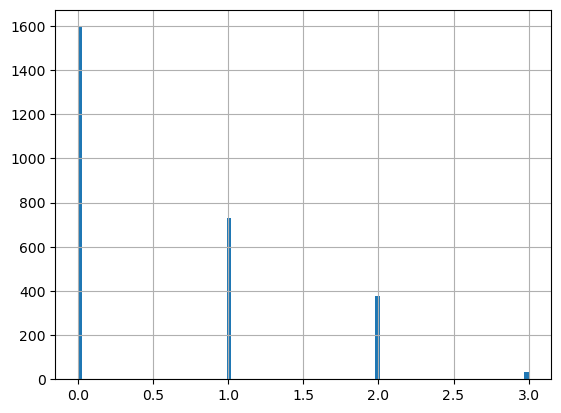

In [12]:
noNaDa.sii.hist(bins=100)

# features

In [37]:
dtype_dict = dict(noNaDa.dtypes)
for column, dtype in dtype_dict.items():
    print(f"{column}: {dtype}")

id: object
Basic_Demos-Enroll_Season: object
Basic_Demos-Age: int64
Basic_Demos-Sex: int64
CGAS-Season: object
CGAS-CGAS_Score: float64
Physical-Season: object
Physical-BMI: float64
Physical-Height: float64
Physical-Weight: float64
Physical-Waist_Circumference: float64
Physical-Diastolic_BP: float64
Physical-HeartRate: float64
Physical-Systolic_BP: float64
Fitness_Endurance-Season: object
Fitness_Endurance-Max_Stage: float64
Fitness_Endurance-Time_Mins: float64
Fitness_Endurance-Time_Sec: float64
FGC-Season: object
FGC-FGC_CU: float64
FGC-FGC_CU_Zone: float64
FGC-FGC_GSND: float64
FGC-FGC_GSND_Zone: float64
FGC-FGC_GSD: float64
FGC-FGC_GSD_Zone: float64
FGC-FGC_PU: float64
FGC-FGC_PU_Zone: float64
FGC-FGC_SRL: float64
FGC-FGC_SRL_Zone: float64
FGC-FGC_SRR: float64
FGC-FGC_SRR_Zone: float64
FGC-FGC_TL: float64
FGC-FGC_TL_Zone: float64
BIA-Season: object
BIA-BIA_Activity_Level_num: float64
BIA-BIA_BMC: float64
BIA-BIA_BMI: float64
BIA-BIA_BMR: float64
BIA-BIA_DEE: float64
BIA-BIA_ECW: fl

BIA-BIA_ICW


923

17.845 2457.91


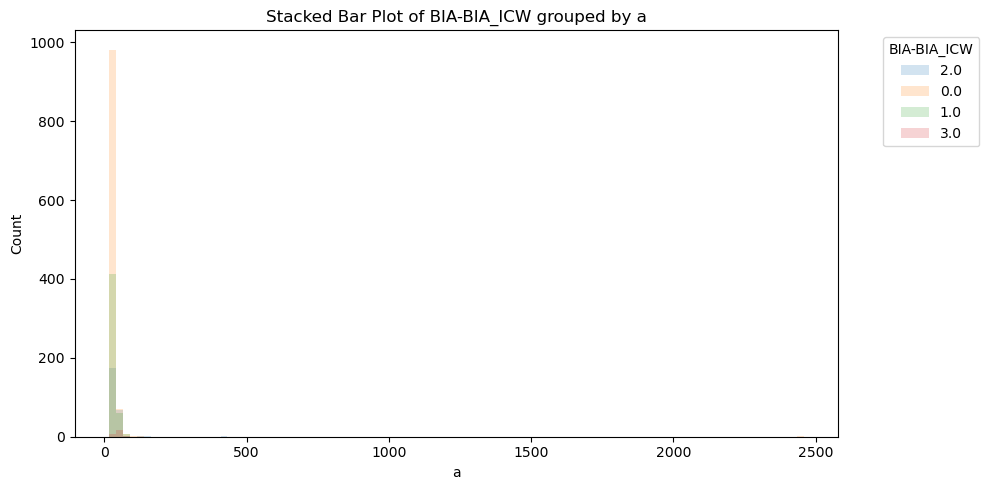

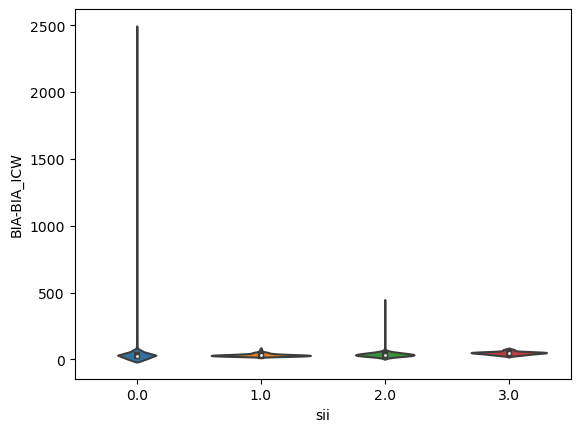

In [20]:
feat = ['id', 'Basic_Demos-Enroll_Season', 'Basic_Demos-Age', 'Basic_Demos-Sex',
       'CGAS-Season', 'CGAS-CGAS_Score', 'Physical-Season', 'Physical-BMI',
       'Physical-Height', 'Physical-Weight', 'Physical-Waist_Circumference',
       'Physical-Diastolic_BP', 'Physical-HeartRate', 'Physical-Systolic_BP',
       'Fitness_Endurance-Season', 'Fitness_Endurance-Max_Stage',
       'Fitness_Endurance-Time_Mins', 'Fitness_Endurance-Time_Sec',
       'FGC-Season', 'FGC-FGC_CU', 'FGC-FGC_CU_Zone', 'FGC-FGC_GSND',
       'FGC-FGC_GSND_Zone', 'FGC-FGC_GSD', 'FGC-FGC_GSD_Zone', 'FGC-FGC_PU',
       'FGC-FGC_PU_Zone', 'FGC-FGC_SRL', 'FGC-FGC_SRL_Zone', 'FGC-FGC_SRR',
       'FGC-FGC_SRR_Zone', 'FGC-FGC_TL', 'FGC-FGC_TL_Zone', 'BIA-Season',
       'BIA-BIA_Activity_Level_num', 'BIA-BIA_BMC', 'BIA-BIA_BMI',
       'BIA-BIA_BMR', 'BIA-BIA_DEE', 'BIA-BIA_ECW', 'BIA-BIA_FFM',
       'BIA-BIA_FFMI', 'BIA-BIA_FMI', 'BIA-BIA_Fat', 'BIA-BIA_Frame_num',
       'BIA-BIA_ICW', 'BIA-BIA_LDM', 'BIA-BIA_LST', 'BIA-BIA_SMM',
       'BIA-BIA_TBW', 'PAQ_A-Season', 'PAQ_A-PAQ_A_Total', 'PAQ_C-Season',
       'PAQ_C-PAQ_C_Total', 'PCIAT-Season', 'PCIAT-PCIAT_01', 'PCIAT-PCIAT_02',
       'PCIAT-PCIAT_03', 'PCIAT-PCIAT_04', 'PCIAT-PCIAT_05', 'PCIAT-PCIAT_06',
       'PCIAT-PCIAT_07', 'PCIAT-PCIAT_08', 'PCIAT-PCIAT_09', 'PCIAT-PCIAT_10',
       'PCIAT-PCIAT_11', 'PCIAT-PCIAT_12', 'PCIAT-PCIAT_13', 'PCIAT-PCIAT_14',
       'PCIAT-PCIAT_15', 'PCIAT-PCIAT_16', 'PCIAT-PCIAT_17', 'PCIAT-PCIAT_18',
       'PCIAT-PCIAT_19', 'PCIAT-PCIAT_20', 'PCIAT-PCIAT_Total', 'SDS-Season',
       'SDS-SDS_Total_Raw', 'SDS-SDS_Total_T', 'PreInt_EduHx-Season',
       'PreInt_EduHx-computerinternet_hoursday', 'sii']
#noNaDa[f].value_counts(), 

f = 'BIA-BIA_ICW'# feat[5]
def eval(f, noNaDa):
    print(f)
    display(noNaDa[f].isna().sum())
    #noNaDa[f].hist(bins=100)
    #grouped = noNaDa.groupby('sii')[f].value_counts().unstack().fillna(0)
    #grouped = noNaDa.groupby('sii')[f]
    min_val = noNaDa[f].min()  # Minimum value across all groups
    max_val = noNaDa[f].max()  # Maximum value across all groups
    print(min_val, max_val)
    # Define the number of bins and calculate bin edges
    num_bins = 100
    bins = np.linspace(min_val, max_val, num_bins + 1)
    fig, ax = plt.subplots(figsize=(10, 5))
    for i in noNaDa.sii.unique():
        ax.hist(noNaDa.loc[noNaDa.sii==i][f], bins=bins, alpha=0.2, label=i)
    plt.title(f'Stacked Bar Plot of {f} grouped by a')
    plt.xlabel('a')
    plt.ylabel('Count')
    plt.legend(title=f, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()
    if noNaDa[f].dtype == np.float64:
        sns.violinplot(x=noNaDa['sii'],y=noNaDa[f])
    else:
        display(pd.crosstab(noNaDa['sii'],noNaDa[f]).style.background_gradient(cmap='viridis'))
        display(pd.crosstab(noNaDa['sii'],noNaDa[f], normalize='index').style.background_gradient(cmap='viridis', vmin=0, vmax=1))
        display(pd.crosstab(noNaDa['sii'],noNaDa[f], normalize='columns').style.background_gradient(cmap='viridis', vmin=0, vmax=1))
eval(f,noNaDa)

sii
0.0    Axes(0.125,0.11;0.775x0.77)
1.0    Axes(0.125,0.11;0.775x0.77)
2.0    Axes(0.125,0.11;0.775x0.77)
3.0    Axes(0.125,0.11;0.775x0.77)
Name: BIA-BIA_ICW, dtype: object

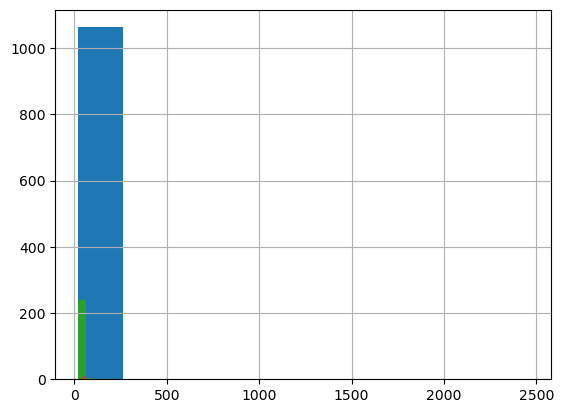

In [12]:
grouped = noNaDa.groupby('sii')[f]
grouped.hist()


In [83]:
seasons = [s for s in trainF if 'Season' in s]
modSFeat = []
for s in seasons:
    #noNaDa['isSameSeason'+s] = (noNaDa['Basic_Demos-Enroll_Season'] == noNaDa[s]).astype(np.int8)
    modSFeat.append('isSameSeason'+s)
    print(noNaDa['isSameSeason'+s].value_counts())

isSameSeasonBasic_Demos-Enroll_Season
True    2520
Name: count, dtype: int64
isSameSeasonCGAS-Season
False    2358
True      162
Name: count, dtype: int64
isSameSeasonPhysical-Season
False    1415
True     1105
Name: count, dtype: int64
isSameSeasonFitness_Endurance-Season
False    2105
True      415
Name: count, dtype: int64
isSameSeasonFGC-Season
False    1431
True     1089
Name: count, dtype: int64
isSameSeasonBIA-Season
False    1883
True      637
Name: count, dtype: int64
isSameSeasonPAQ_A-Season
False    2323
True      197
Name: count, dtype: int64
isSameSeasonPAQ_C-Season
False    1738
True      782
Name: count, dtype: int64
isSameSeasonPCIAT-Season
False    1541
True      979
Name: count, dtype: int64
isSameSeasonSDS-Season
False    1527
True      993
Name: count, dtype: int64
isSameSeasonPreInt_EduHx-Season
True     2391
False     129
Name: count, dtype: int64


## bio impedance measurements


In [134]:
zScore = (noNaDa['BIA-BIA_ICW'] - noNaDa['BIA-BIA_ICW'].mean())/noNaDa['BIA-BIA_ICW'].std()
noNaDa['BIA-BIA_ICW'].describe()
zScore.dropna().sort_values()

3691    -0.259793
3581    -0.257205
3658    -0.256611
1710    -0.252732
1944    -0.251860
          ...    
2299     1.572731
3774     1.790172
2490     2.032251
3511     6.713872
3205    41.200754
Name: BIA-BIA_ICW, Length: 1813, dtype: float64

In [124]:
pd.set_option('display.max_rows',81)
pd.set_option('display.max_columns',101)
noNaDa.loc[noNaDa['BIA-BIA_ICW']>200]#['BIA-BIA_ICW']

,id,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,Physical-Waist_Circumference,Physical-Diastolic_BP,Physical-HeartRate,Physical-Systolic_BP,Fitness_Endurance-Season,Fitness_Endurance-Max_Stage,Fitness_Endurance-Time_Mins,Fitness_Endurance-Time_Sec,FGC-Season,FGC-FGC_CU,FGC-FGC_CU_Zone,FGC-FGC_GSND,FGC-FGC_GSND_Zone,FGC-FGC_GSD,FGC-FGC_GSD_Zone,FGC-FGC_PU,FGC-FGC_PU_Zone,FGC-FGC_SRL,FGC-FGC_SRL_Zone,FGC-FGC_SRR,FGC-FGC_SRR_Zone,FGC-FGC_TL,FGC-FGC_TL_Zone,BIA-Season,BIA-BIA_Activity_Level_num,BIA-BIA_BMC,BIA-BIA_BMI,BIA-BIA_BMR,BIA-BIA_DEE,BIA-BIA_ECW,BIA-BIA_FFM,BIA-BIA_FFMI,BIA-BIA_FMI,BIA-BIA_Fat,BIA-BIA_Frame_num,BIA-BIA_ICW,BIA-BIA_LDM,BIA-BIA_LST,BIA-BIA_SMM,BIA-BIA_TBW,PAQ_A-Season,PAQ_A-PAQ_A_Total,PAQ_C-Season,PAQ_C-PAQ_C_Total,PCIAT-Season,PCIAT-PCIAT_01,PCIAT-PCIAT_02,PCIAT-PCIAT_03,PCIAT-PCIAT_04,PCIAT-PCIAT_05,PCIAT-PCIAT_06,PCIAT-PCIAT_07,PCIAT-PCIAT_08,PCIAT-PCIAT_09,PCIAT-PCIAT_10,PCIAT-PCIAT_11,PCIAT-PCIAT_12,PCIAT-PCIAT_13,PCIAT-PCIAT_14,PCIAT-PCIAT_15,PCIAT-PCIAT_16,PCIAT-PCIAT_17,PCIAT-PCIAT_18,PCIAT-PCIAT_19,PCIAT-PCIAT_20,PCIAT-PCIAT_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday,sii,isSameSeasonCGAS,isSameSeasonBasic_Demos-Enroll_Season,isSameSeasonCGAS-Season,isSameSeasonPhysical-Season,isSameSeasonFitness_Endurance-Season,isSameSeasonFGC-Season,isSameSeasonBIA-Season,isSameSeasonPAQ_A-Season,isSameSeasonPAQ_C-Season,isSameSeasonPCIAT-Season,isSameSeasonSDS-Season,isSameSeasonPreInt_EduHx-Season
3205,cedf96c5,Fall,9,1,Spring,50.0,Winter,16.972291,54.0,70.4,NaN,75.0,95.0,151.0,Winter,NaN,NaN,NaN,Winter,5.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,7.5,0.0,8.0,0.0,9.0,1.0,Winter,2.0,4115.360,0.048267,83152.2,124728.0,3233.000,8799.08,7.86485,-7.81659,-8745.08,2.0,2457.910,3108.17,4683.710,3607.690,5690.910,NaN,NaN,Fall,3.269,Winter,2.0,2.0,3.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,13.0,Winter,36.0,51.0,Fall,0.0,0.0,False,1,0,0,0,0,0,0,1,0,0,1
3511,e252dcb6,Spring,13,1,Fall,58.0,Spring,23.605261,61.5,127.0,NaN,57.0,74.0,110.0,NaN,NaN,NaN,NaN,Spring,20.0,1.0,22.5,2.0,23.7,2.0,1.0,0.0,12.0,1.0,12.0,1.0,12.0,1.0,Summer,2.0,401.002,23.607800,11540.8,17311.2,350.849,1171.51,217.77100,-194.16300,-1044.51,2.0,428.264,392.40,770.511,823.028,779.114,NaN,NaN,Summer,1.250,Summer,1.0,4.0,4.0,0.0,4.0,4.0,0.0,5.0,5.0,5.0,4.0,0.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,68.0,Summer,48.0,67.0,Spring,3.0,2.0,False,1,0,1,0,1,0,0,0,0,0,1


In [128]:
test#.loc[test['BIA-BIA_ICW']>50]

,id,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,Physical-Waist_Circumference,Physical-Diastolic_BP,Physical-HeartRate,Physical-Systolic_BP,Fitness_Endurance-Season,Fitness_Endurance-Max_Stage,Fitness_Endurance-Time_Mins,Fitness_Endurance-Time_Sec,FGC-Season,FGC-FGC_CU,FGC-FGC_CU_Zone,FGC-FGC_GSND,FGC-FGC_GSND_Zone,FGC-FGC_GSD,FGC-FGC_GSD_Zone,FGC-FGC_PU,FGC-FGC_PU_Zone,FGC-FGC_SRL,FGC-FGC_SRL_Zone,FGC-FGC_SRR,FGC-FGC_SRR_Zone,FGC-FGC_TL,FGC-FGC_TL_Zone,BIA-Season,BIA-BIA_Activity_Level_num,BIA-BIA_BMC,BIA-BIA_BMI,BIA-BIA_BMR,BIA-BIA_DEE,BIA-BIA_ECW,BIA-BIA_FFM,BIA-BIA_FFMI,BIA-BIA_FMI,BIA-BIA_Fat,BIA-BIA_Frame_num,BIA-BIA_ICW,BIA-BIA_LDM,BIA-BIA_LST,BIA-BIA_SMM,BIA-BIA_TBW,PAQ_A-Season,PAQ_A-PAQ_A_Total,PAQ_C-Season,PAQ_C-PAQ_C_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday
0,00008ff9,Fall,5,0,Winter,51.0,Fall,16.877316,46.00,50.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fall,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,7.0,0.0,6.0,0.0,6.0,1.0,Fall,2.0,2.66855,16.8792,932.498,1492.00,8.25598,41.5862,13.8177,3.06143,9.21377,1.0,24.4349,8.89536,38.9177,19.5413,32.6909,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fall,3.0
1,000fd460,Summer,9,0,NaN,NaN,Fall,14.035590,48.00,46.0,22.0,75.0,70.0,122.0,NaN,NaN,NaN,NaN,Fall,3.0,0.0,NaN,NaN,NaN,NaN,5.0,0.0,11.0,1.0,11.0,1.0,3.0,0.0,Winter,2.0,2.57949,14.0371,936.656,1498.65,6.01993,42.0291,12.8254,1.21172,3.97085,1.0,21.0352,14.97400,39.4497,15.4107,27.0552,NaN,NaN,Fall,2.340,Fall,46.0,64.0,Summer,0.0
2,00105258,Summer,10,1,Fall,71.0,Fall,16.648696,56.50,75.6,NaN,65.0,94.0,117.0,Fall,5.0,7.0,33.0,Fall,20.0,1.0,10.2,1.0,14.7,2.0,7.0,1.0,10.0,1.0,10.0,1.0,5.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Summer,2.170,Fall,38.0,54.0,Summer,2.0
3,00115b9f,Winter,9,0,Fall,71.0,Summer,18.292347,56.00,81.6,NaN,60.0,97.0,117.0,Summer,6.0,9.0,37.0,Summer,18.0,1.0,NaN,NaN,NaN,NaN,5.0,0.0,7.0,0.0,7.0,0.0,7.0,1.0,Summer,3.0,3.84191,18.2943,1131.430,1923.44,15.59250,62.7757,14.0740,4.22033,18.82430,2.0,30.4041,16.77900,58.9338,26.4798,45.9966,NaN,NaN,Winter,2.451,Summer,31.0,45.0,Winter,0.0
4,0016bb22,Spring,18,1,Summer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Summer,1.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,001f3379,Spring,13,1,Winter,50.0,Summer,22.279952,59.50,112.2,NaN,60.0,73.0,102.0,NaN,NaN,NaN,NaN,Summer,12.0,0.0,16.5,2.0,17.9,2.0,6.0,0.0,10.0,1.0,11.0,1.0,8.0,0.0,Summer,2.0,4.33036,30.1865,1330.970,1996.45,30.21240,84.0285,16.6877,13.49880,67.97150,2.0,32.9141,20.90200,79.6982,35.3804,63.1265,NaN,NaN,Spring,4.110,Summer,40.0,56.0,Spring,0.0
6,0038ba98,Fall,10,0,NaN,NaN,Fall,19.660760,55.00,84.6,NaN,123.0,83.0,163.0,NaN,NaN,NaN,NaN,Fall,9.0,1.0,NaN,NaN,NaN,NaN,2.0,0.0,11.0,1.0,11.0,1.0,11.0,1.0,Fall,2.0,3.78271,19.6629,1135.860,1817.38,16.32750,63.2470,14.7000,4.96291,21.35300,2.0,30.8936,16.02590,59.4643,26.1957,47.2211,NaN,NaN,Winter,3.670,Winter,27.0,40.0,Fall,3.0
7,0068a485,Fall,10,1,NaN,NaN,Fall,16.861286,59.25,84.2,27.0,71.0,90.0,116.0,NaN,NaN,NaN,NaN,Fall,0.0,0.0,12.6,2.0,11.1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,Fall,3.0,4.05726,16.8631,1180.040,1888.06,21.94000,67.9527,13.6092,3.25395,16.24740,2.0,28.5367,17.47600,63.8954,28.7680,50.4767,NaN,NaN,Fall,1.270,NaN,NaN,NaN,Fall,2.0
8,0069fbed,Summer,15,0,NaN,NaN,Spring,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spring,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Summer,2.0
9,0083e397,Summer,19,1,Summer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## enrolled vs participated season

## sex and age relation

Basic_Demos-Age


0

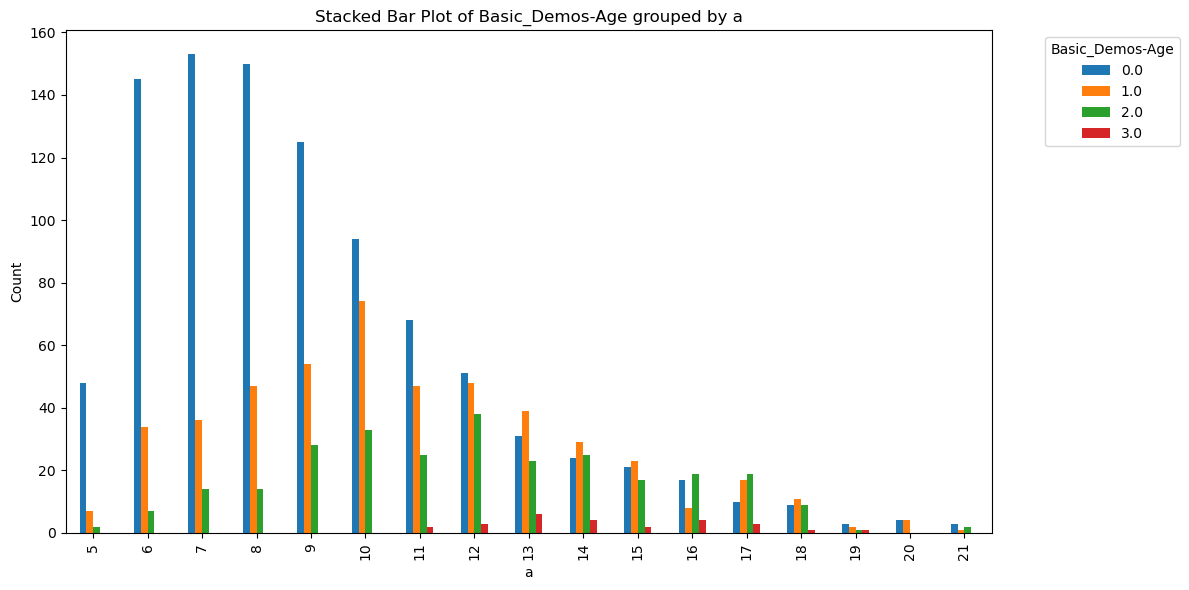

Basic_Demos-Age,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
sii,,,,,,,,,,,,,,,,,
0.000000,48,145,153,150,125,94,68,51,31,24,21,17,10,9,3,4,3
1.000000,7,34,36,47,54,74,47,48,39,29,23,8,17,11,2,4,1
2.000000,2,7,14,14,28,33,25,38,23,25,17,19,19,9,1,0,2
3.000000,0,0,0,0,0,0,2,3,6,4,2,4,3,1,1,0,0


Basic_Demos-Age,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
sii,,,,,,,,,,,,,,,,,
0.000000,0.050209,0.151674,0.160042,0.156904,0.130753,0.098326,0.071130,0.053347,0.032427,0.025105,0.021967,0.017782,0.010460,0.009414,0.003138,0.004184,0.003138
1.000000,0.014553,0.070686,0.074844,0.097713,0.112266,0.153846,0.097713,0.099792,0.081081,0.060291,0.047817,0.016632,0.035343,0.022869,0.004158,0.008316,0.002079
2.000000,0.007246,0.025362,0.050725,0.050725,0.101449,0.119565,0.090580,0.137681,0.083333,0.090580,0.061594,0.068841,0.068841,0.032609,0.003623,0.000000,0.007246
3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.076923,0.115385,0.230769,0.153846,0.076923,0.153846,0.115385,0.038462,0.038462,0.000000,0.000000


Basic_Demos-Age,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
sii,,,,,,,,,,,,,,,,,
0.000000,0.842105,0.779570,0.753695,0.710900,0.603865,0.467662,0.478873,0.364286,0.313131,0.292683,0.333333,0.354167,0.204082,0.300000,0.428571,0.500000,0.500000
1.000000,0.122807,0.182796,0.177340,0.222749,0.260870,0.368159,0.330986,0.342857,0.393939,0.353659,0.365079,0.166667,0.346939,0.366667,0.285714,0.500000,0.166667
2.000000,0.035088,0.037634,0.068966,0.066351,0.135266,0.164179,0.176056,0.271429,0.232323,0.304878,0.269841,0.395833,0.387755,0.300000,0.142857,0.000000,0.333333
3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.014085,0.021429,0.060606,0.048780,0.031746,0.083333,0.061224,0.033333,0.142857,0.000000,0.000000


Basic_Demos-Age


0

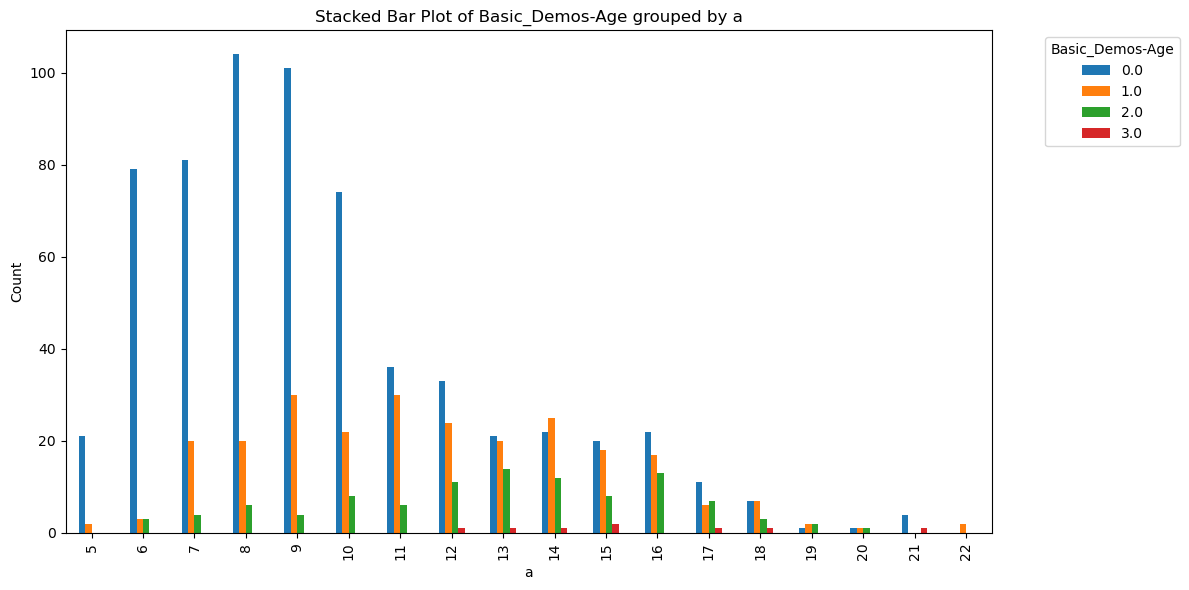

Basic_Demos-Age,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22
sii,,,,,,,,,,,,,,,,,,
0.000000,21,79,81,104,101,74,36,33,21,22,20,22,11,7,1,1,4,0
1.000000,2,3,20,20,30,22,30,24,20,25,18,17,6,7,2,1,0,2
2.000000,0,3,4,6,4,8,6,11,14,12,8,13,7,3,2,1,0,0
3.000000,0,0,0,0,0,0,0,1,1,1,2,0,1,1,0,0,1,0


Basic_Demos-Age,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22
sii,,,,,,,,,,,,,,,,,,
0.000000,0.032915,0.123824,0.126959,0.163009,0.158307,0.115987,0.056426,0.051724,0.032915,0.034483,0.031348,0.034483,0.017241,0.010972,0.001567,0.001567,0.006270,0.000000
1.000000,0.008032,0.012048,0.080321,0.080321,0.120482,0.088353,0.120482,0.096386,0.080321,0.100402,0.072289,0.068273,0.024096,0.028112,0.008032,0.004016,0.000000,0.008032
2.000000,0.000000,0.029412,0.039216,0.058824,0.039216,0.078431,0.058824,0.107843,0.137255,0.117647,0.078431,0.127451,0.068627,0.029412,0.019608,0.009804,0.000000,0.000000
3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.125000,0.125000,0.125000,0.250000,0.000000,0.125000,0.125000,0.000000,0.000000,0.125000,0.000000


Basic_Demos-Age,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22
sii,,,,,,,,,,,,,,,,,,
0.000000,0.913043,0.929412,0.771429,0.800000,0.748148,0.711538,0.500000,0.478261,0.375000,0.366667,0.416667,0.423077,0.440000,0.388889,0.200000,0.333333,0.800000,0.000000
1.000000,0.086957,0.035294,0.190476,0.153846,0.222222,0.211538,0.416667,0.347826,0.357143,0.416667,0.375000,0.326923,0.240000,0.388889,0.400000,0.333333,0.000000,1.000000
2.000000,0.000000,0.035294,0.038095,0.046154,0.029630,0.076923,0.083333,0.159420,0.250000,0.200000,0.166667,0.250000,0.280000,0.166667,0.400000,0.333333,0.000000,0.000000
3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.014493,0.017857,0.016667,0.041667,0.000000,0.040000,0.055556,0.000000,0.000000,0.200000,0.000000


In [58]:
men = noNaDa.loc[noNaDa['Basic_Demos-Sex'] == 0]
eval(f,men)
women = noNaDa.loc[noNaDa['Basic_Demos-Sex'] == 1]
eval(f,women)

# create reports for each feature

In [51]:
from reportlab.lib.pagesizes import A4
from reportlab.pdfgen import canvas
from reportlab.lib.utils import ImageReader
from io import BytesIO
from tqdm import tqdm

 55%|█████▍    | 6/11 [00:05<00:05,  1.11s/it]/var/folders/15/v1vyry112dv3d398dy47k8v40000gn/T/ipykernel_80192/2255349229.py:118: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(10, 6))
100%|██████████| 11/11 [00:08<00:00,  1.29it/s]


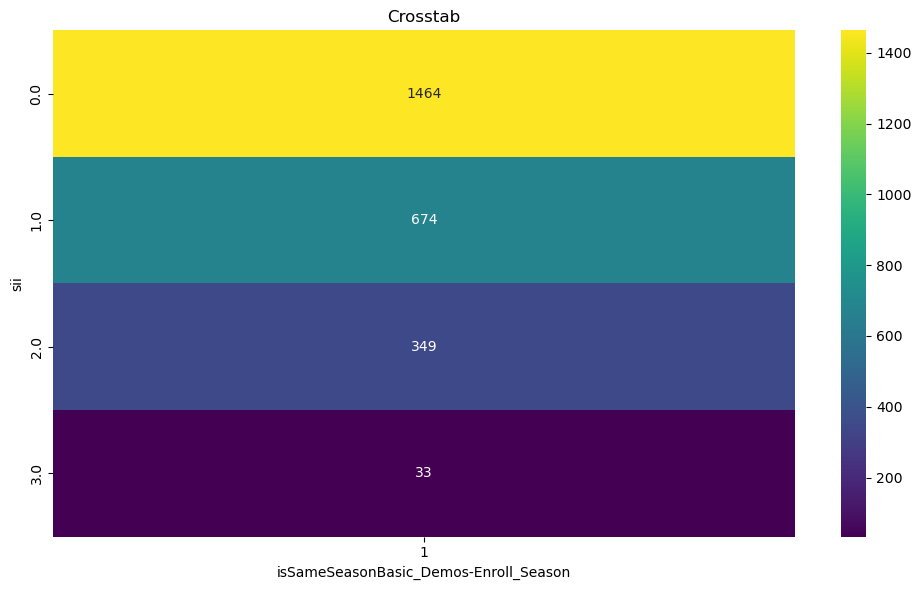

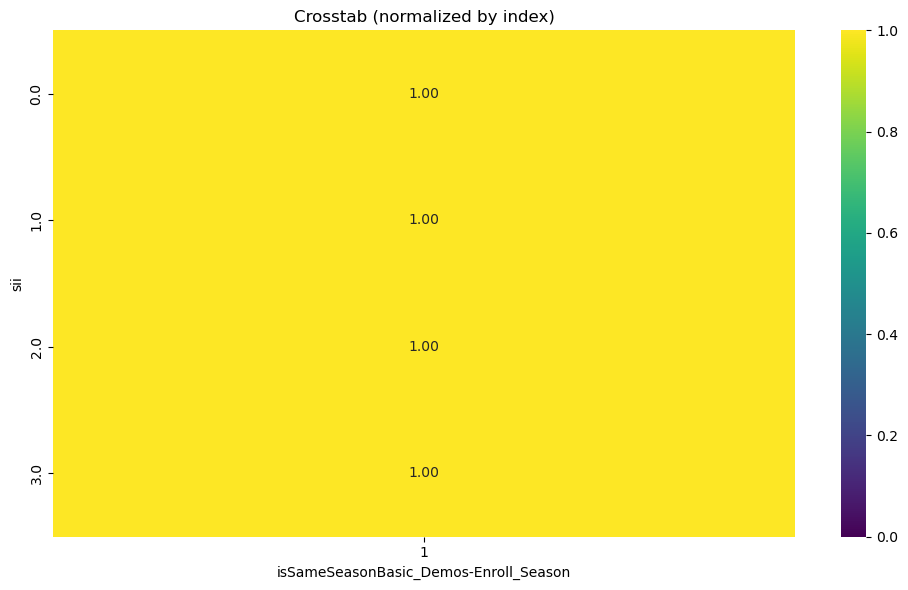

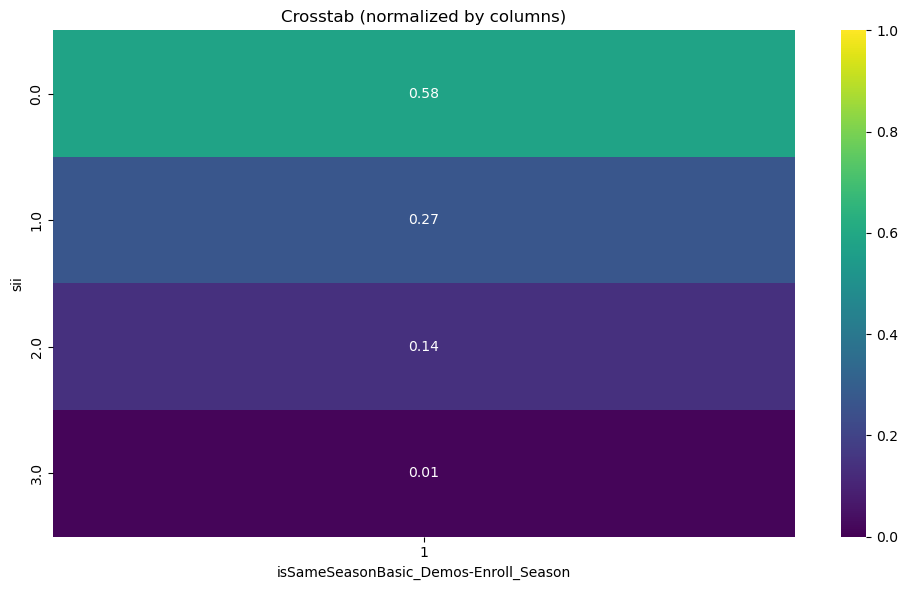

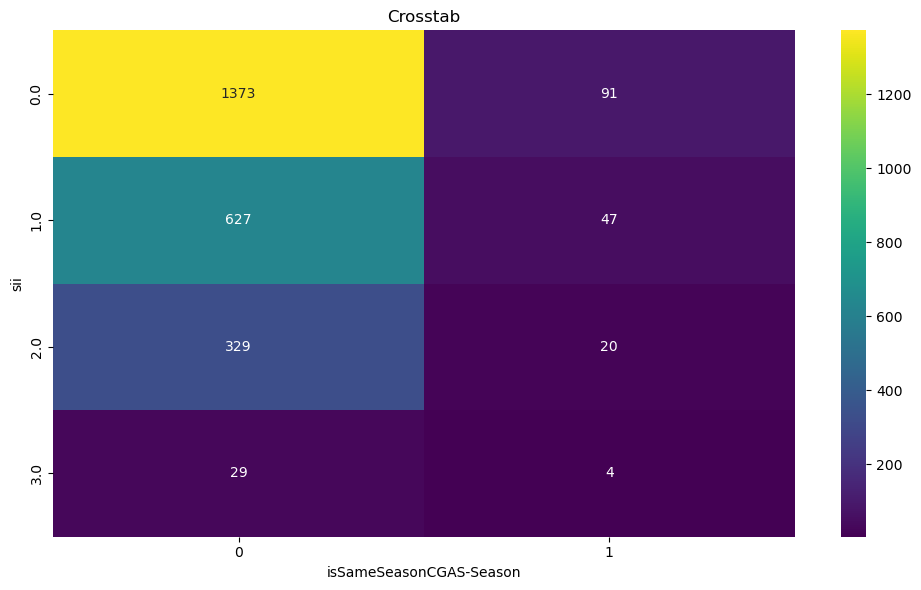

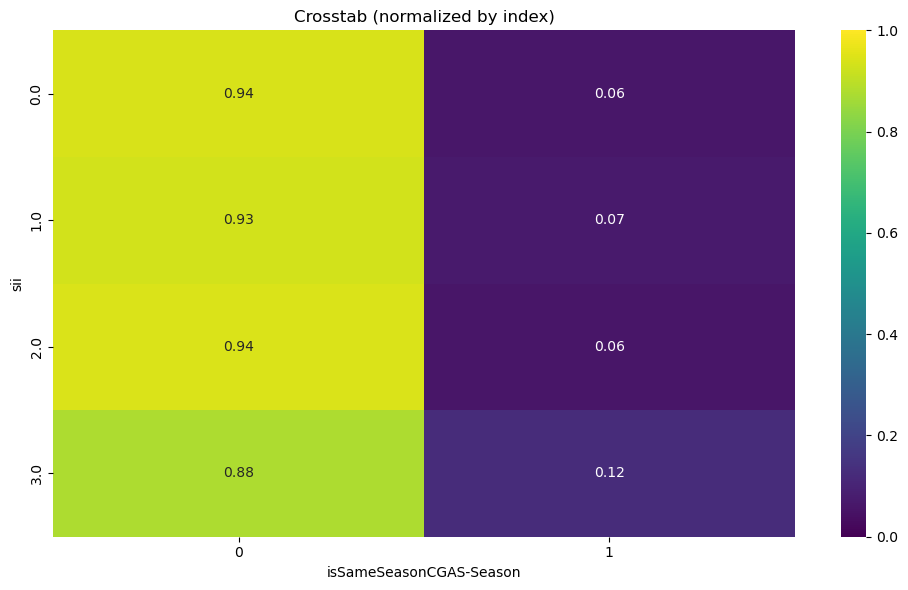

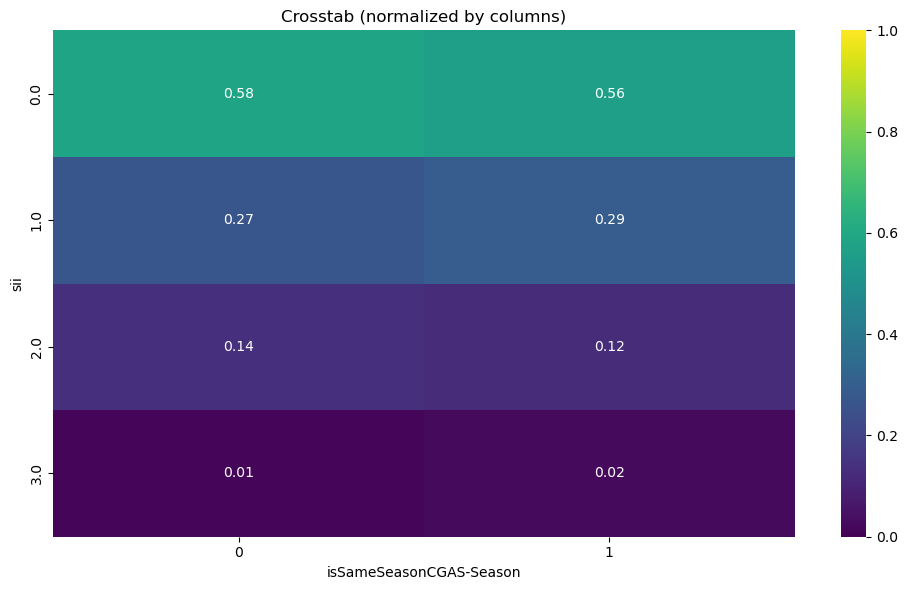

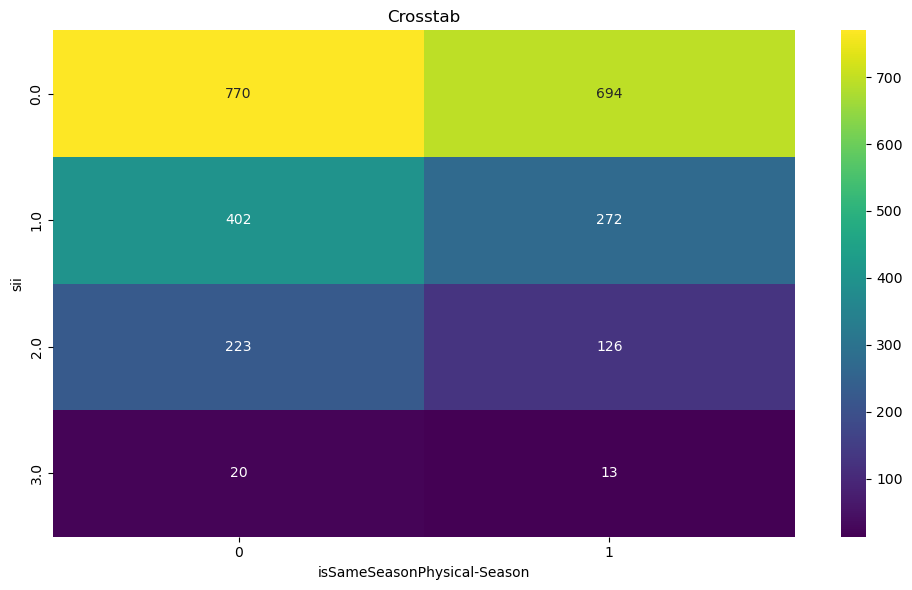

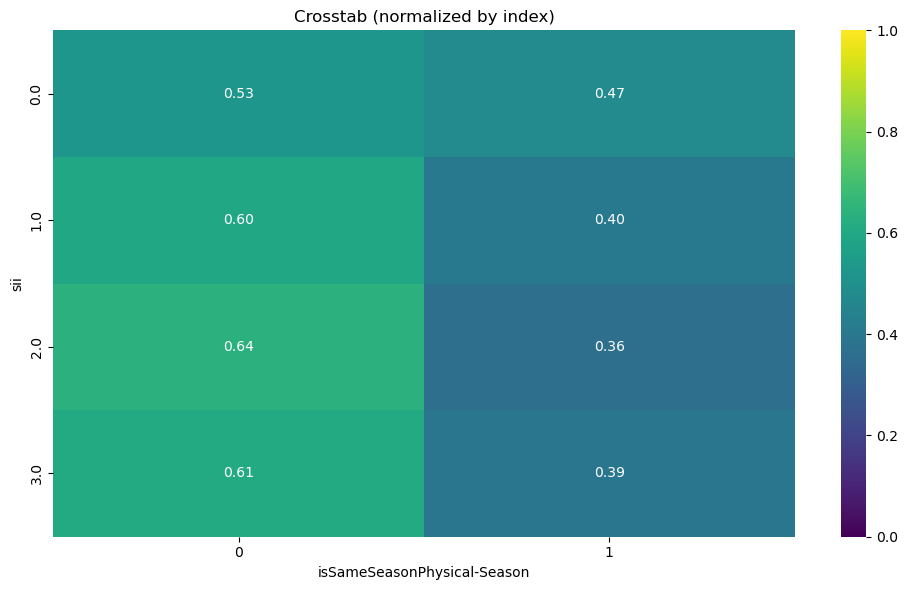

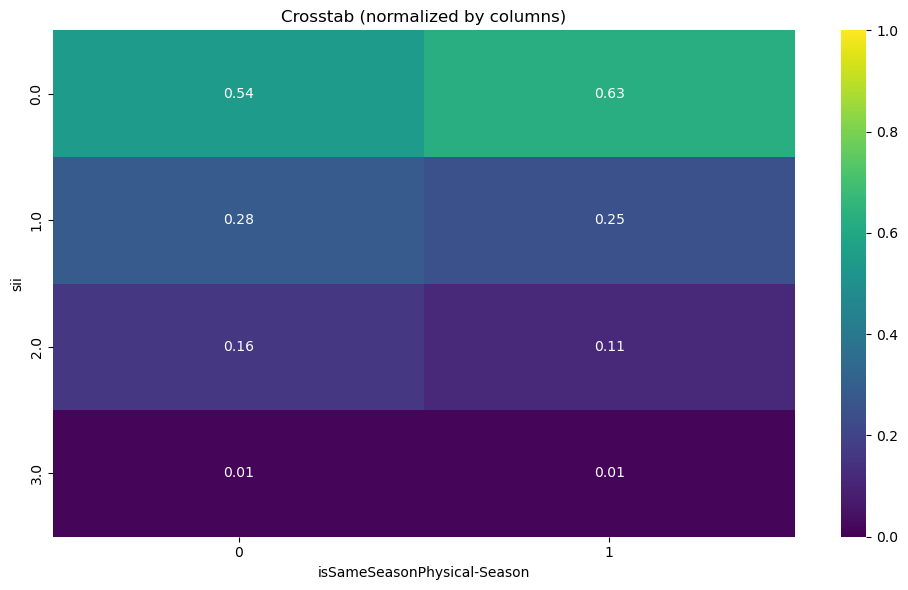

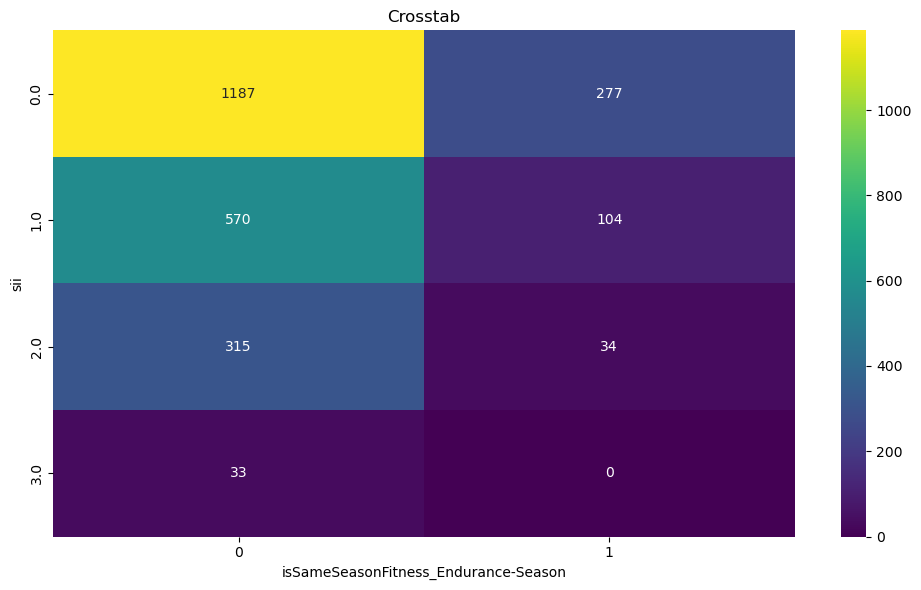

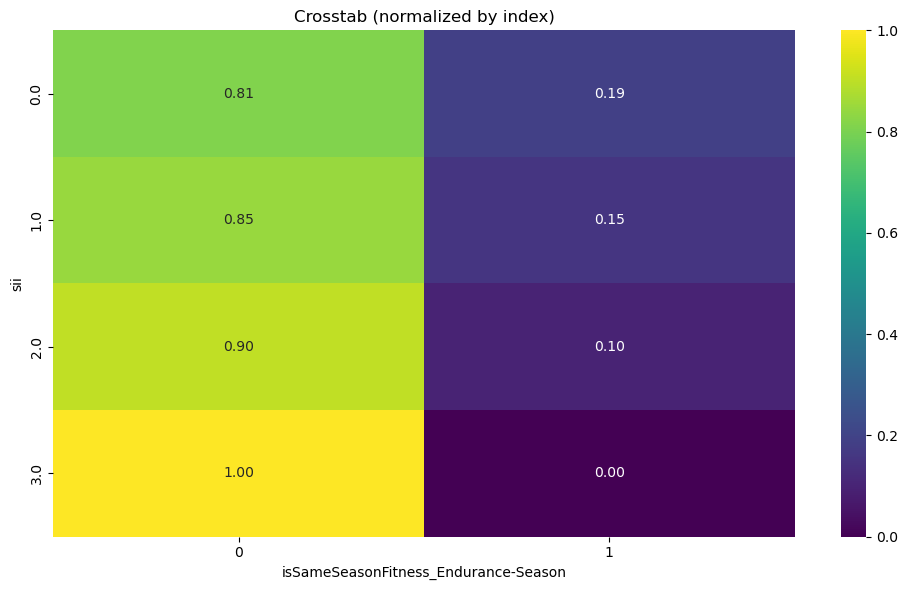

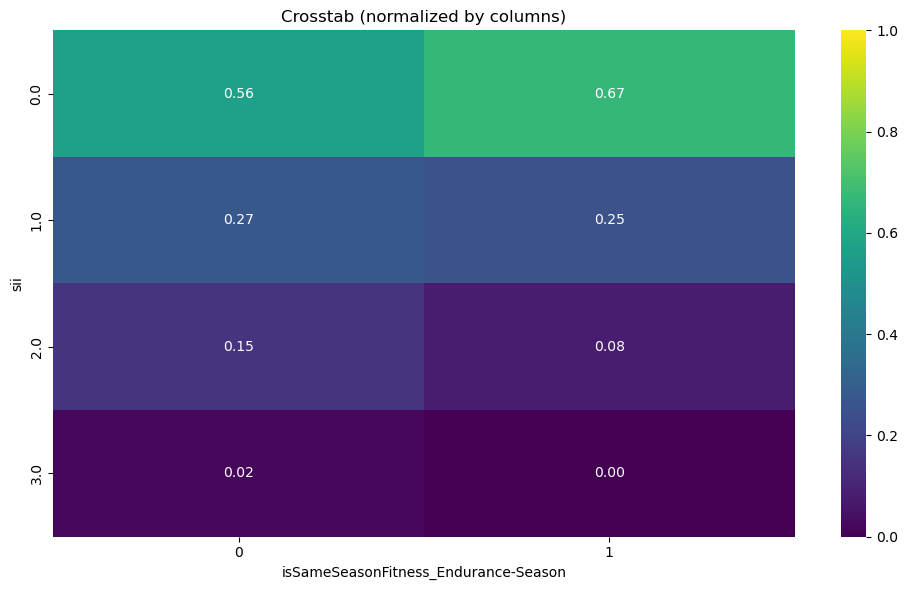

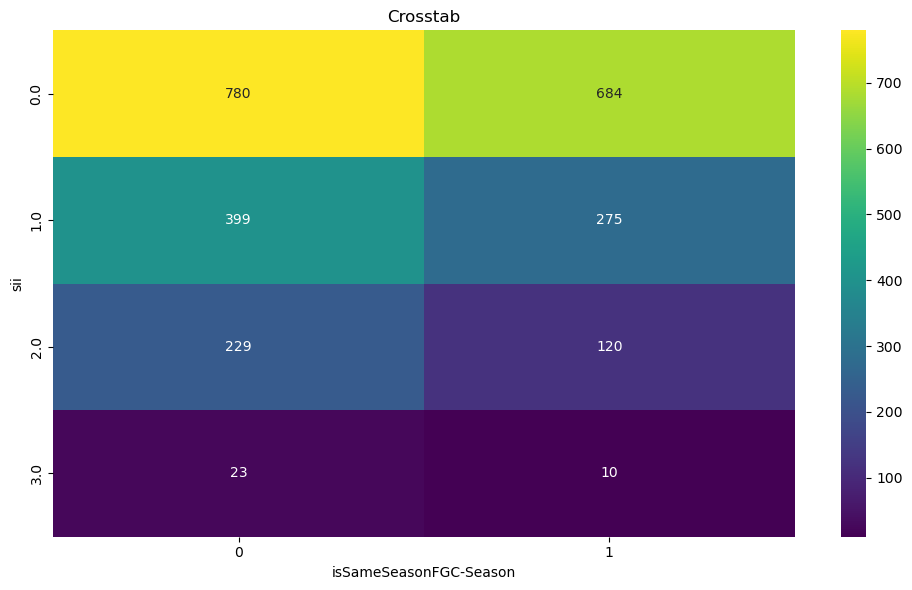

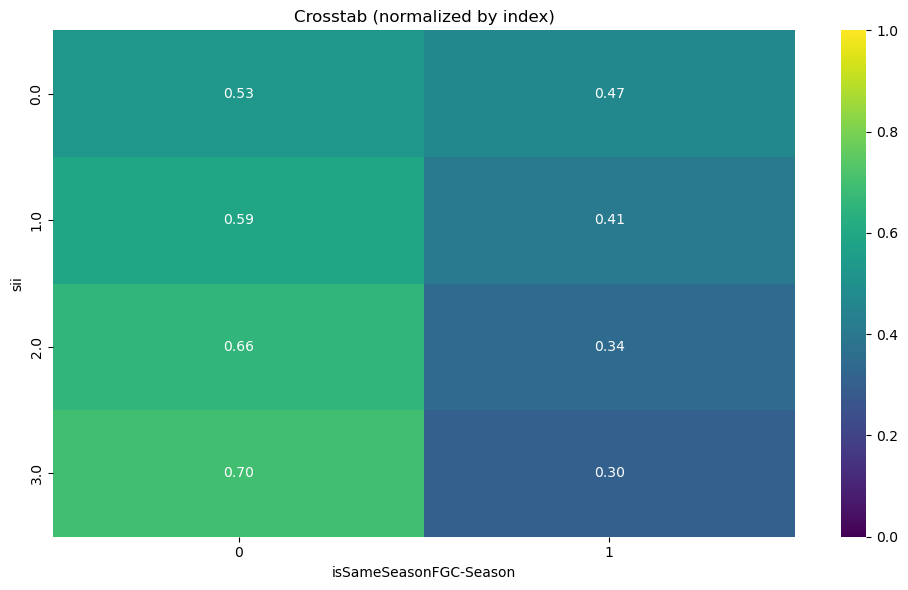

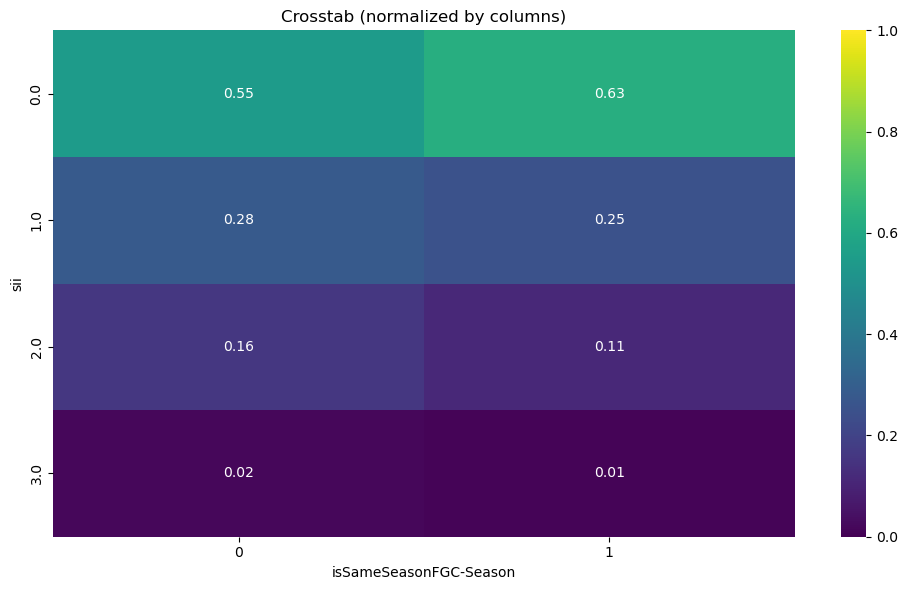

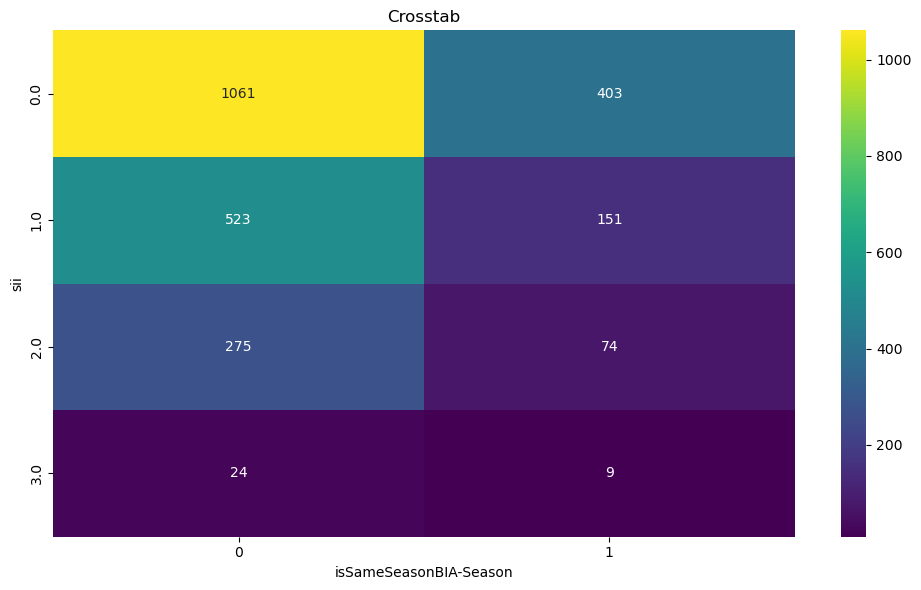

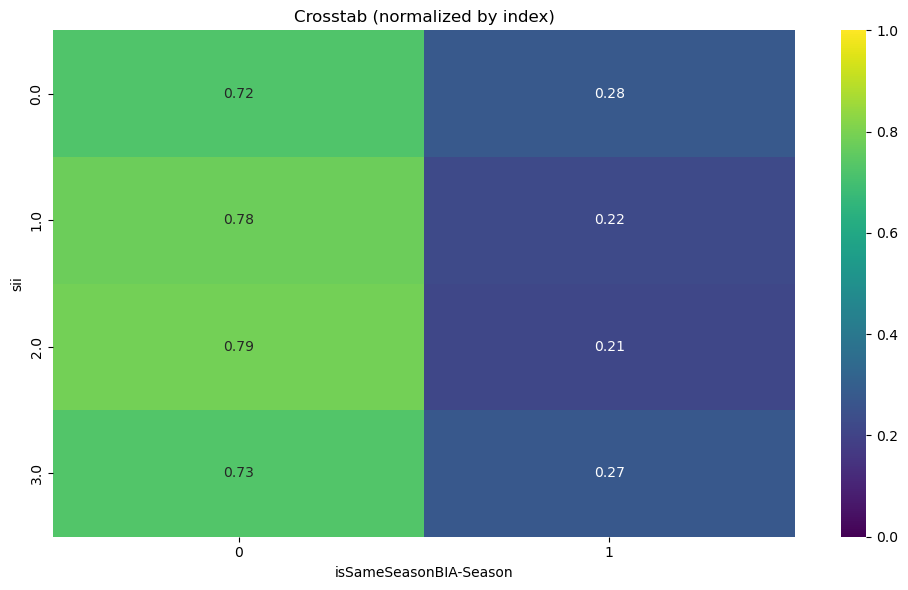

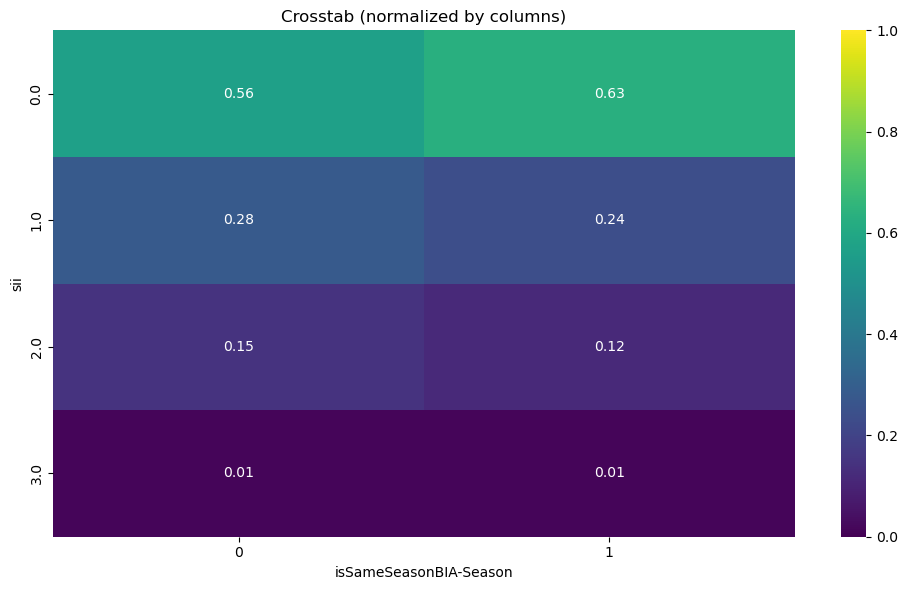

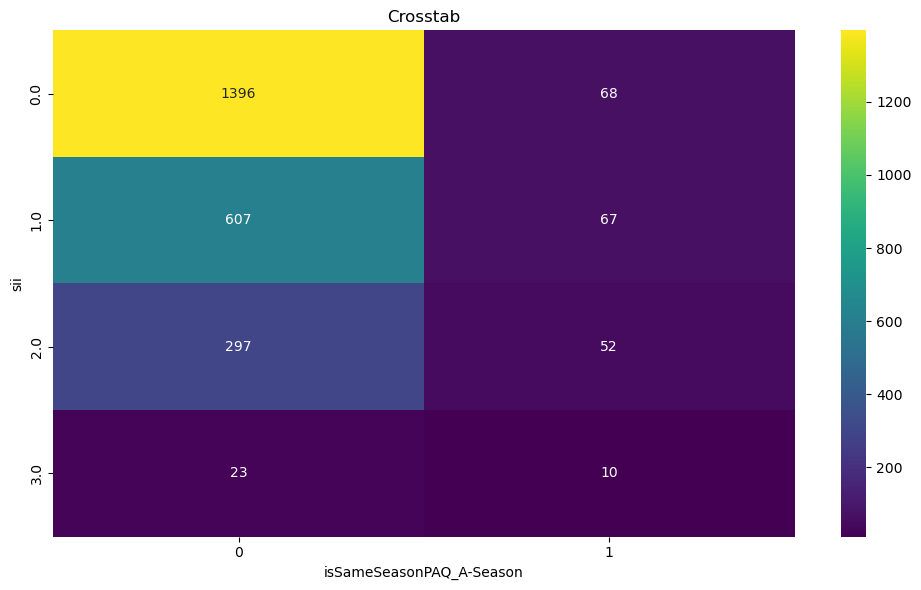

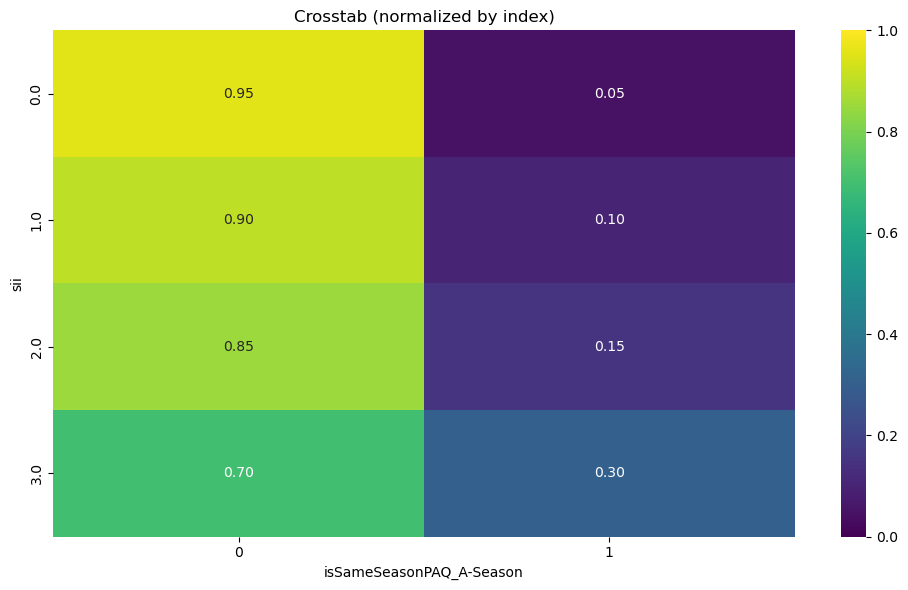

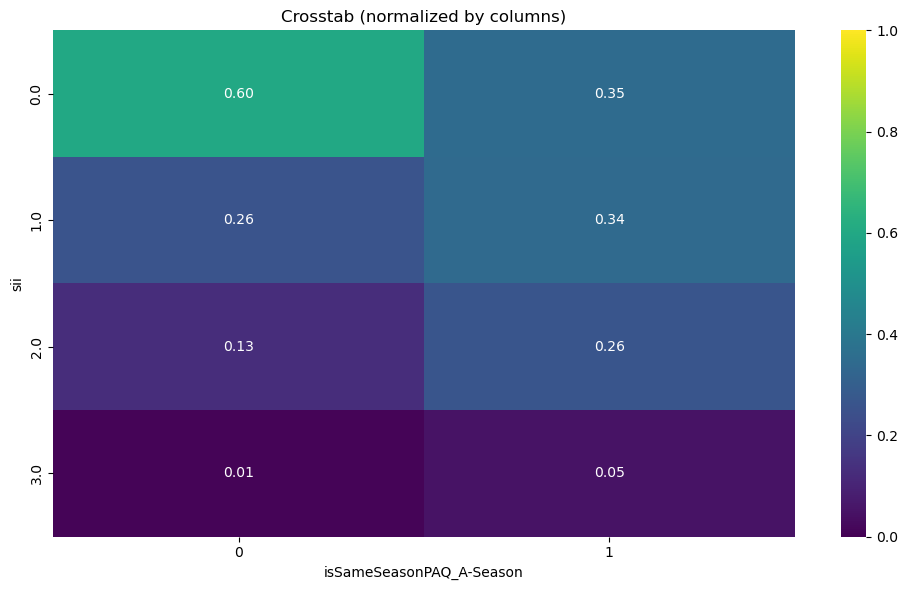

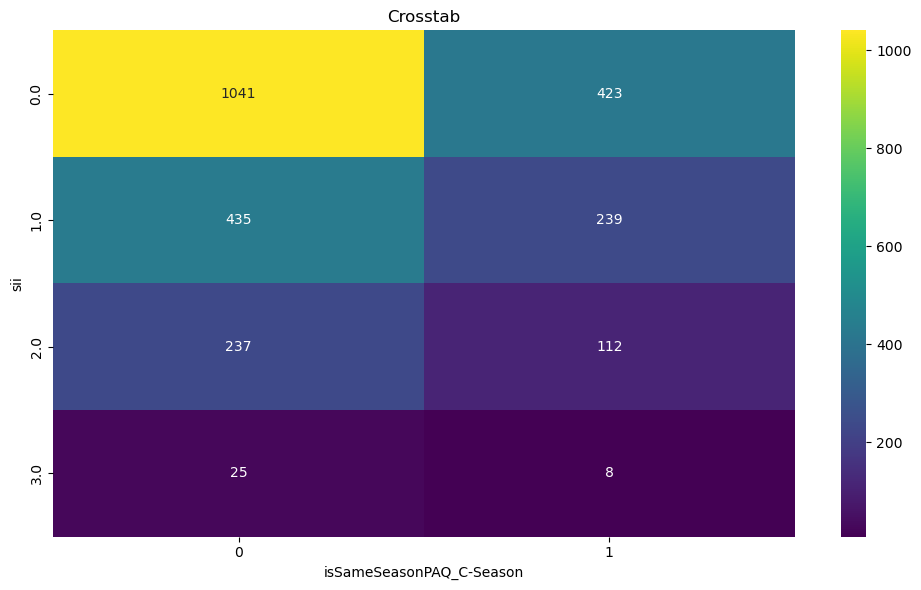

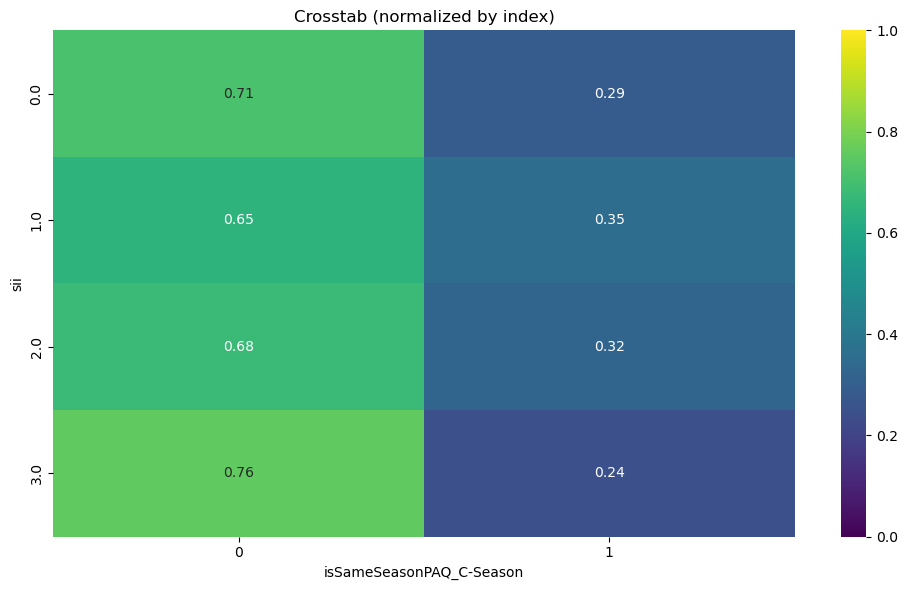

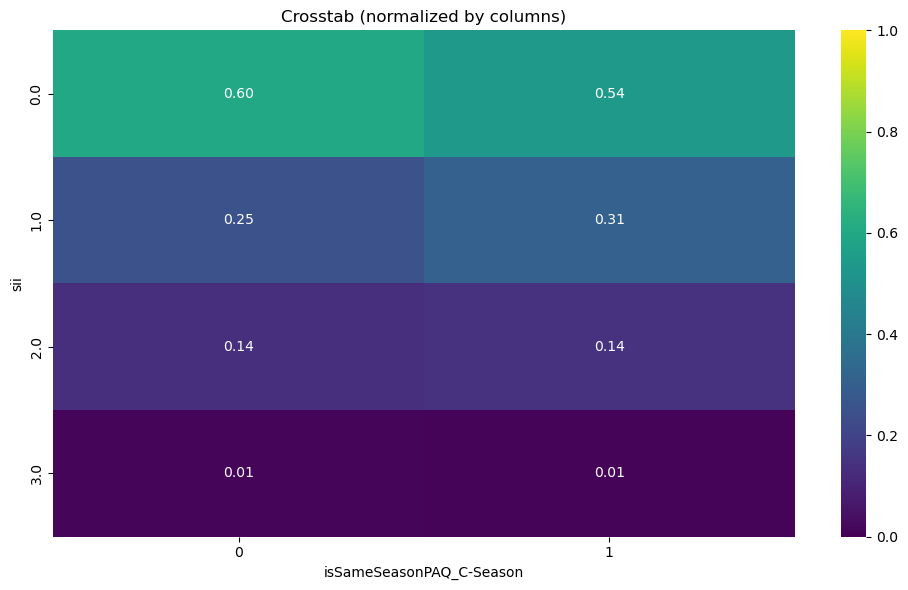

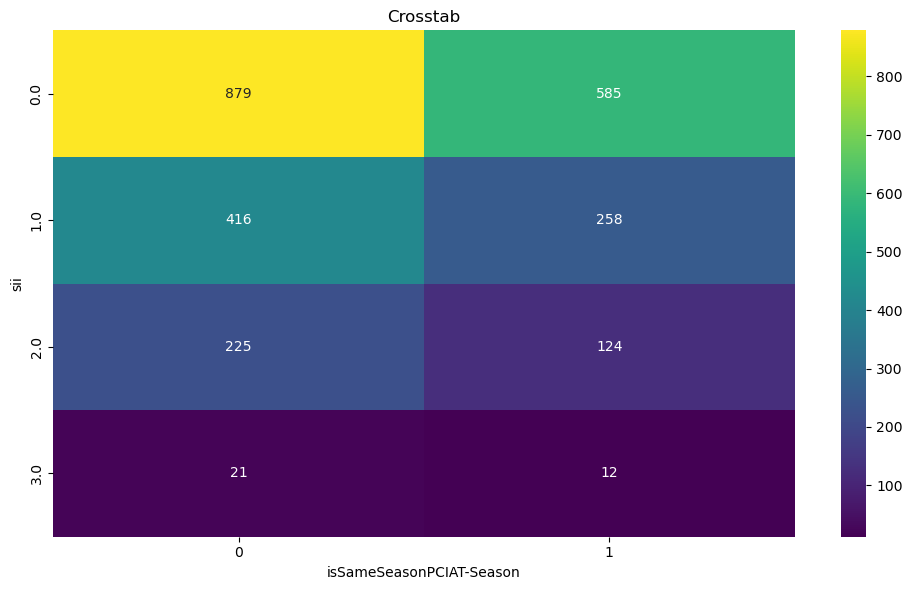

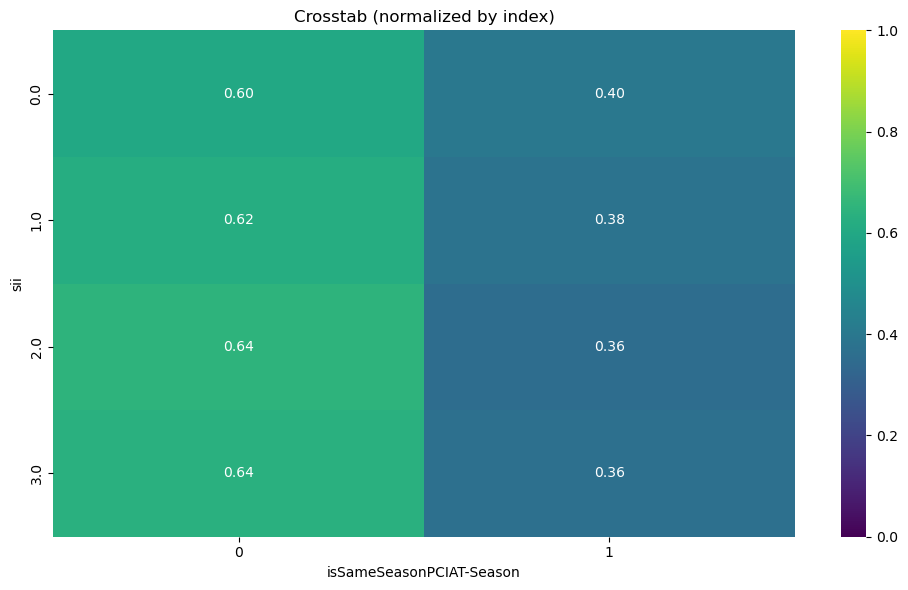

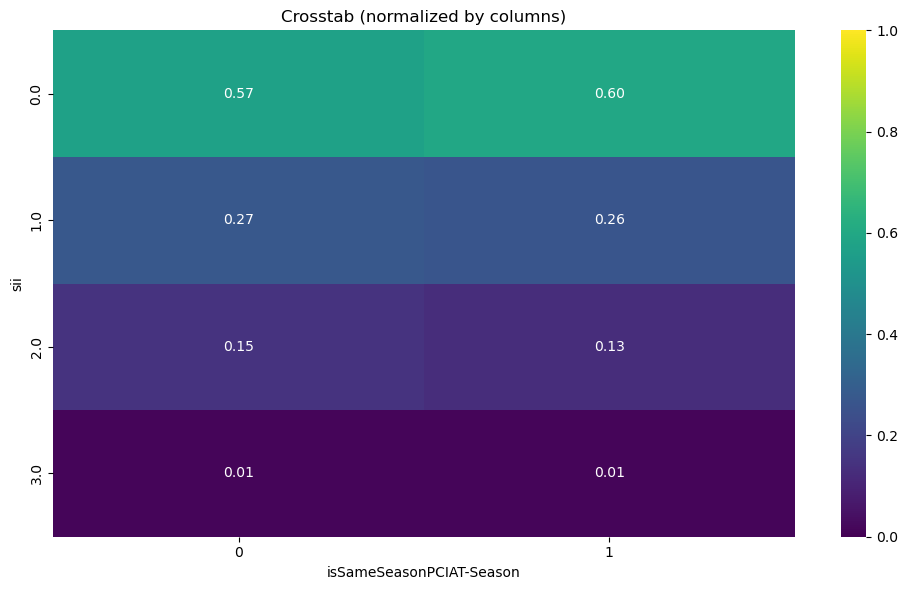

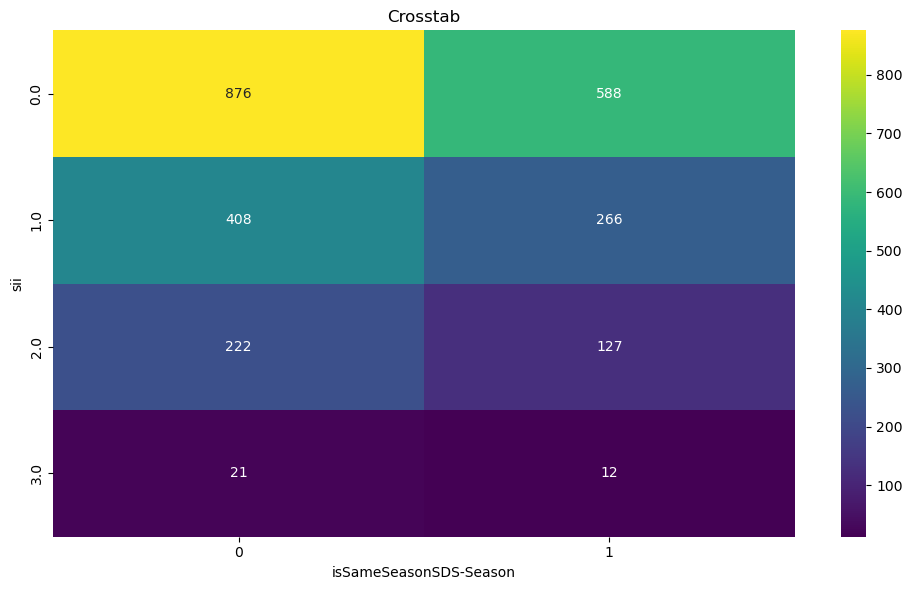

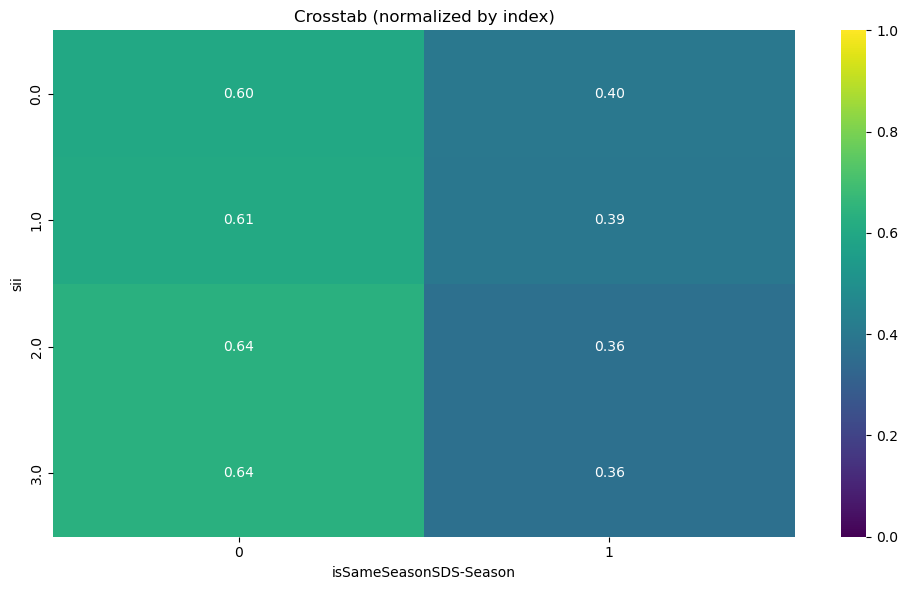

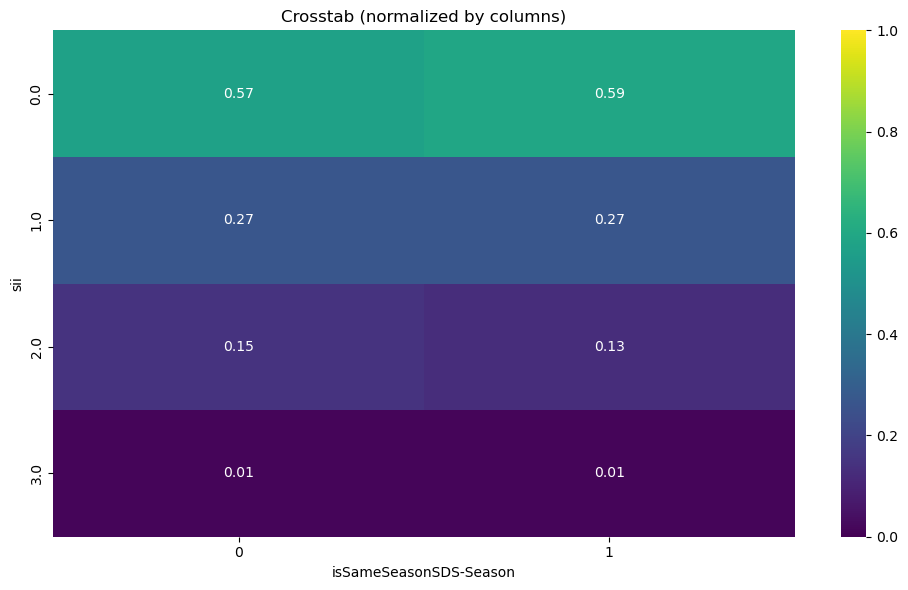

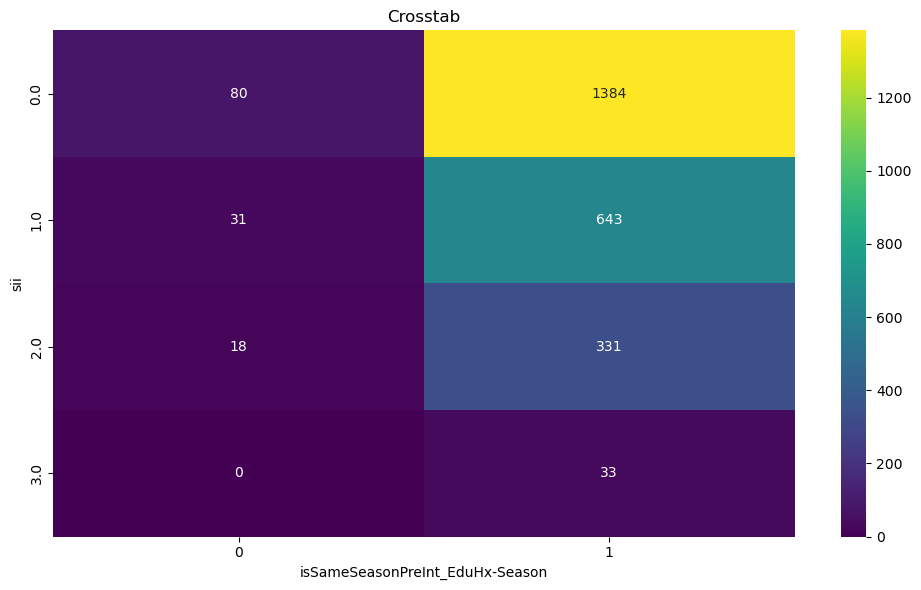

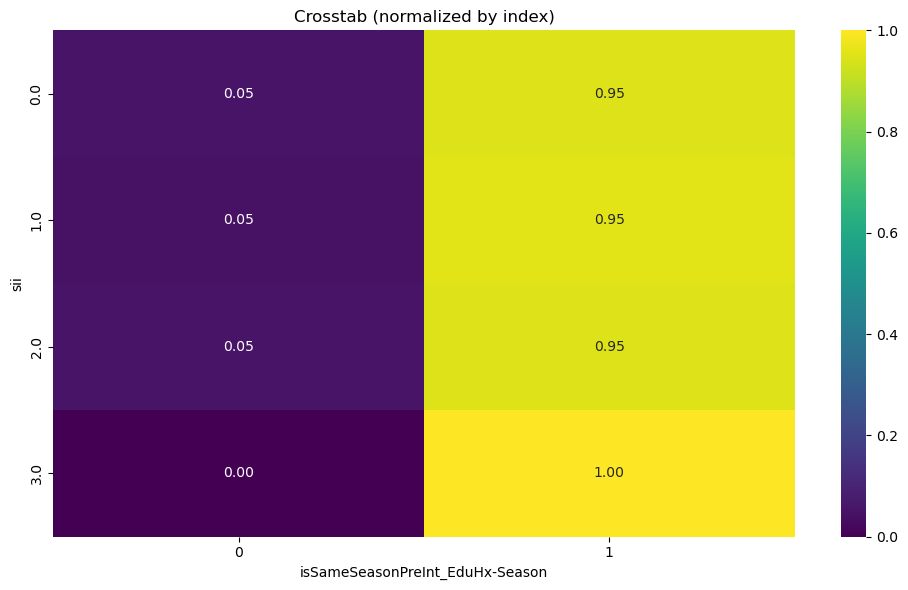

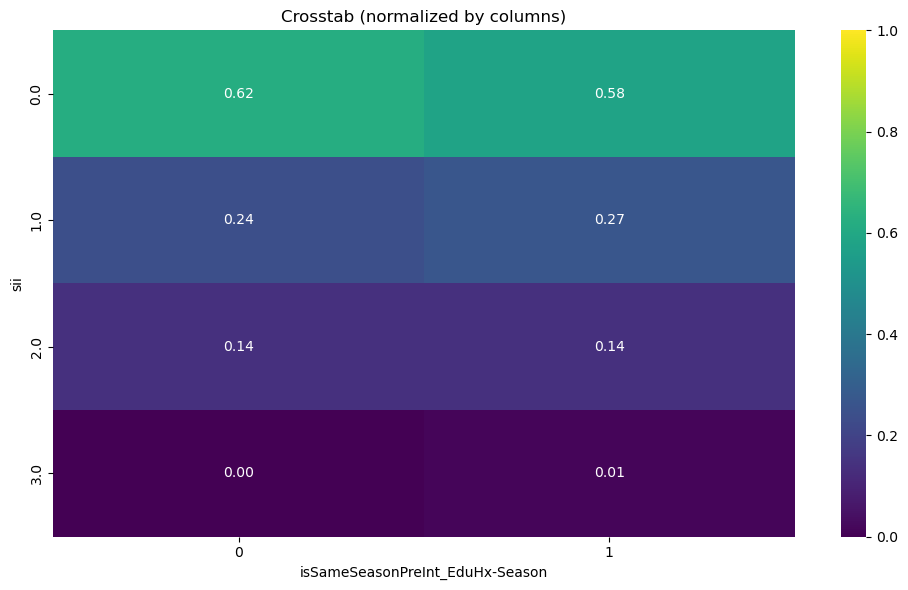

In [87]:
def eval_to_pdf(f, noNaDa, pdf_filename):
    c = canvas.Canvas(pdf_filename, pagesize=A4)
    width, height = A4

    # Title
    c.setFont("Helvetica-Bold", 16)
    c.drawString(50, height - 50, f"Analysis of {f}")

    # Missing values
    c.setFont("Helvetica", 12)
    missing_values = noNaDa[f].isna().sum()
    c.drawString(50, height - 80, f"Missing values: {missing_values}")

    # hist
    plt.figure(figsize=(10, 5))
    noNaDa[f].hist(bins=30)
    plt.title(f'Histogram of {f}')
    plt.xlabel(f)
    plt.ylabel('Count')
    plt.tight_layout()
    
    img_buffer2 = BytesIO()
    plt.savefig(img_buffer2, format='png')
    img_buffer2.seek(0)
    c.drawImage(ImageReader(img_buffer2), 50, height - 350, width=500, height=250)
    plt.close()

    c.showPage()
    # Violin plot or crosstab
    if noNaDa[f].dtype == np.float64 and len(noNaDa[f].unique())>20:
        zScore =(noNaDa[f]-noNaDa[f].mean())/(noNaDa[f].std())
        # hist
        noOut = noNaDa.loc[abs(zScore)<5]
        c.drawString(50, height - 810, f"outliers values: {noNaDa.loc[abs(zScore)>5].shape[0]}")

        fig, (ax1, ax2,ax3,ax4,ax5) = plt.subplots(5, 1, figsize=(10, 10))
        # Violin plot
        sns.violinplot(x=noOut['sii'], y=noOut[f], ax=ax1)
        ax1.set_title(f'Violin Plot of {f} by sii')
        
        # Correlation matrix
        #corr_matrix = noNaDa[['sii', f]].corr(method='spearman')
        #sns.heatmap(corr_matrix, annot=True, cmap='RdBu', ax=ax2, vmin=-1,vmax=1)
        #ax2.set_title('Correlation Matrix')
        #noOut['siiJitter'] = noOut['sii'] + np.random.random()*.8 - 0.4
        noOut=noOut.assign(**{'siiJitter': noOut['sii'] + np.random.random(len(noOut))*.8 -.4})
        noOut.plot.scatter(x='siiJitter', y=f, ax=ax2, alpha=0.1)
        ax2.set_xlabel('sii jitter')
        ax2.set_ylabel(f)
        noOut[f].hist(bins=30, ax=ax3)
        noOut.plot.hexbin(x='siiJitter', y=f, alpha=1, gridsize=10, ax=ax4)

        min_val = noOut[f].min()  # Minimum value across all groups
        max_val = noOut[f].max()  # Maximum value across all groups
        #print(min_val, max_val)
        # Define the number of bins and calculate bin edges
        num_bins = 100
        bins = np.linspace(min_val, max_val, num_bins + 1)
        for i in noOut.sii.unique():
            ax5.hist(noOut.loc[noOut.sii==i][f], bins=bins, alpha=0.2, label=i)
        ax5.set_xlabel(f)
        ax5.set_ylabel('frequency')
        plt.legend()
        plt.tight_layout()
        
        img_buffer = BytesIO()
        plt.savefig(img_buffer, format='png')
        img_buffer.seek(0)
        c.drawImage(ImageReader(img_buffer), 50, height - 800, width=500, height=800)
        plt.close()

        # 'Basic_Demos-Age', 'Basic_Demos-Sex', 'Physical-Height', 'Physical-Weight',
        c.showPage()
        fig2, (ax1, ax2,ax3,ax4,ax5,ax6) = plt.subplots(6, 1, figsize=(10, 10))
        noOut=noOut.assign(**{'ageJitter': noOut['Basic_Demos-Age'] + np.random.random(len(noOut))*.8 -.4})
        #noOut.plot.hexbin(x='Basic_Demos-Age', y=f, alpha=1, gridsize=20, ax=ax1)
        noOut.plot.scatter(x='ageJitter', y=f, alpha=0.1, ax=ax1)
        sns.violinplot(x=noOut['Basic_Demos-Age'], y=noOut[f], ax=ax2)
        noOut=noOut.assign(**{'sexJitter': noOut['Basic_Demos-Sex'] + np.random.random(len(noOut))*.8 -.4})
        #noOut.plot.hexbin(x='Basic_Demos-Sex', y=f, alpha=1, gridsize=20, ax=ax2)
        noOut.plot.scatter(x='sexJitter', y=f, alpha=0.1, ax=ax3)
        sns.violinplot(x=noOut['Basic_Demos-Sex'], y=noOut[f], ax=ax4)
        noOut.plot.scatter(x='Physical-Height', y=f, alpha=0.1, ax=ax5)
        noOut.plot.scatter(x='Physical-Weight', y=f, alpha=0.1, ax=ax6)
        plt.legend()
        plt.tight_layout()
        
        img_buffer = BytesIO()
        plt.savefig(img_buffer, format='png')
        img_buffer.seek(0)
        c.drawImage(ImageReader(img_buffer), 50, height - 800, width=500, height=800)
        plt.close()
    else:
        # Bar plot
        grouped = noNaDa.groupby(f)['sii'].value_counts().unstack().fillna(0)
        fig, (ax1,ax2) = plt.subplots(2, 1, figsize=(10, 5))
        grouped.plot(kind='bar', stacked=False, ax=ax1)
        grouped.plot(kind='bar', stacked=True, ax=ax2)
        plt.title(f'Bar Plot of {f} grouped by sii')
        plt.xlabel(f)
        plt.ylabel('Count')
        plt.legend(title='sii', bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.tight_layout()

        img_buffer = BytesIO()
        plt.savefig(img_buffer, format='png')
        img_buffer.seek(0)
        c.drawImage(ImageReader(img_buffer), 50, height - 400, width=500, height=250)
        plt.close()
        c.showPage()
        # Create crosstabs
        crosstab = pd.crosstab(noNaDa['sii'], noNaDa[f])
        crosstab_norm_index = pd.crosstab(noNaDa['sii'], noNaDa[f], normalize='index')
        crosstab_norm_columns = pd.crosstab(noNaDa['sii'], noNaDa[f], normalize='columns')

        # Function to create and save heatmap
        def create_heatmap(data, title,normalized=True):
            plt.figure(figsize=(10, 6))
            if normalized:
                sns.heatmap(data, annot=True, cmap='viridis', fmt='.2f', vmin=0, vmax=1)
            else:
                sns.heatmap(data, annot=True, cmap='viridis', fmt='.0f')
            plt.title(title)
            plt.tight_layout()
            
            img_buffer = BytesIO()
            plt.savefig(img_buffer, format='png')
            img_buffer.seek(0)
            return img_buffer

        # Create heatmaps
        heatmap_regular = create_heatmap(crosstab, 'Crosstab', False)
        heatmap_norm_index = create_heatmap(crosstab_norm_index, 'Crosstab (normalized by index)')
        heatmap_norm_columns = create_heatmap(crosstab_norm_columns, 'Crosstab (normalized by columns)')

        # Add heatmaps to PDF
        c.drawImage(ImageReader(heatmap_regular), 50, height - 700, width=500, height=250)
        c.showPage()  # New page for normalized crosstabs
        c.drawImage(ImageReader(heatmap_norm_index), 50, height - 300, width=500, height=250)
        c.drawImage(ImageReader(heatmap_norm_columns), 50, height - 600, width=500, height=250)

    c.showPage()
    c.save()

# Usage
if 1:
    for i,f in enumerate(tqdm(modSFeat)):#trainF)):
        if f == 'ii' or f =='id':
            continue
        eval_to_pdf(f, noNaDa, 'reports/'+str(i)+'output_report'+f+'.pdf')
else:
    f = 'CGAS-CGAS_Score'
    #f = 'BIA-BIA_ICW'
    #eval_to_pdf(f, noNaDa, 'output_report'+f+'.pdf')

In [85]:
noNaDa[f]

0       False
1       False
2       False
3       False
5       False
6       False
12      False
15      False
16      False
18      False
20      False
21      False
22      False
23      False
24      False
25      False
27      False
28      False
31      False
36      False
38      False
41      False
45      False
46      False
48      False
49      False
50      False
51       True
52      False
53      False
54      False
55      False
56      False
57       True
58      False
59      False
60       True
61      False
62      False
63      False
64      False
68      False
70      False
72      False
74      False
75      False
77      False
79      False
80      False
81      False
82      False
83      False
85      False
86      False
88      False
89      False
90      False
91      False
92      False
94      False
96      False
97      False
98      False
99      False
100      True
101     False
103     False
104     False
106     False
108     False
109     False
112   